# 0.0 Imports

In [4]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

warnings.filterwarnings( 'ignore' )

# 0.1 Load Data

In [5]:
df_raw = pd.read_csv('../datasets/df_ready.csv')

In [6]:
df_raw = df_raw.drop(columns=['Unnamed: 0', 'Date_imp', 'Cluster', 'condition','currency', 'imageURLs','shipping', 'sourceURLs', 'weight', 'Date_imp_d.1','Zscore_1','price_std'])

In [7]:
df_raw.head(1)

Date_imp_d                 Category_name  \
0  2017/12/14  speaker, portable, bluetooth   

                                                name  price  disc_price  \
0  Boytone - 2500W 2.1-Ch. Home Theater System - ...   69.0       64.99   

      merchant  Disc_percentage isSale  Imp_count    brand  \
0  Walmart.com             0.06    Yes          1  Boytone   

                                       p_description             dateAdded  \
0  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   

               dateSeen           dateUpdated manufacturer     Day_n  month  \
0  2017-12-14T06:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday     12   

    month_n  day  Week_Number  
0  December   14           50

# 0.2 Rename Columns

In [8]:
df_raw.columns = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'date_added', 'date_seen', 'date_updated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']

# 1.0 Descrição dos Dados

In [9]:
df1 = df_raw.copy()

## 1.1 Data Dimension

In [10]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 23151
Number of columns: 20


## 1.2 Data Dtypes

In [11]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.3 Check NA

In [12]:
df1.isna().sum()
#Não tem muito NA nas colunas que iremos usar

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.4 Change Data Dtypes

In [13]:
df1['date_imp'] = pd.to_datetime(df1['date_imp'])

## 1.5 Descriptive Statistics

In [14]:
num_att = df1.select_dtypes(include = ['float64','int64'])
cat_att = df1.select_dtypes(exclude = ['float64','int64','datetime64[ns]'])

## 1.5.1 Numerical attributes

In [15]:
#central tendency
ct1 = pd.DataFrame(num_att.apply(np.mean)).T #média
ct2 = pd.DataFrame(num_att.apply(np.median)).T #mediana

#dispersion
d1 = pd.DataFrame(num_att.apply(np.std)).T #desvio padrão
d2 = pd.DataFrame(num_att.apply(np.min)).T #min
d3 = pd.DataFrame(num_att.apply(np.max)).T #max
d4 = pd.DataFrame(num_att.apply(lambda x: x.max() - x.min())).T #range
d5 = pd.DataFrame(num_att.apply(lambda x: x.skew())).T #skew
d6 = pd.DataFrame(num_att.apply(lambda x: x.kurtosis())).T #kurtosis

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['att','min','max','range','mean','median','std','skew','kurtosis']
m

att  min       max     range        mean  median         std  \
0            price  1.0  10879.95  10878.95  513.037803  199.99  859.091448   
1       disc_price  1.0  10879.95  10878.95  494.104295  199.00  808.571509   
2  disc_percentage  0.0      0.80      0.80    0.016933    0.00    0.077847   
3        imp_count  1.0     31.00     30.00    6.560926    5.00    5.403049   
4            month  1.0     12.00     11.00    7.651030    8.00    2.592787   
5              day  1.0     31.00     30.00   15.693879   16.00    9.681413   
6      week_number  1.0     51.00     50.00   31.342750   32.00   11.316253   

       skew   kurtosis  
0  4.595160  34.411146  
1  4.748349  39.612839  
2  5.217632  28.754920  
3  1.286351   1.639569  
4 -0.099417  -0.628859  
5  0.032258  -1.331838  
6 -0.266980  -0.648027

# 2.0 EDA

In [16]:
df2 = df1.copy()

In [17]:
df2.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 2.1 Qual merchant mais vendeu?

merchant  date_imp
1       Bestbuy.com     11287
4  bhphotovideo.com      5064
2       Walmart.com      3947
5          ebay.com      2809
0        Amazon.com        25
6         kmart.com        17
3    barcodable.com         2

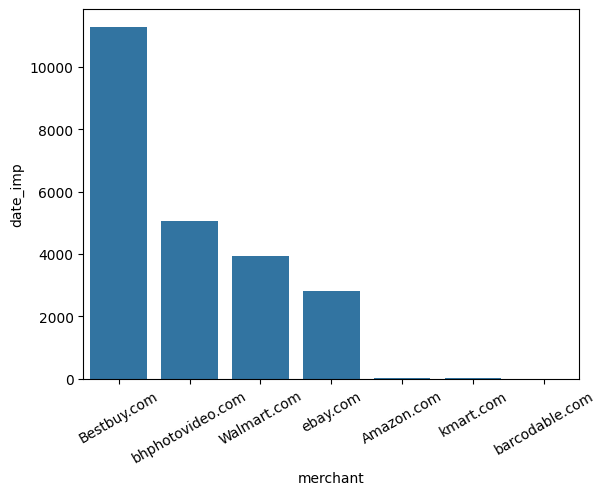

In [18]:
aux1 = df2[['date_imp','merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.xticks(rotation=30)
sns.barplot(x='merchant', y='date_imp',data=aux1);
aux1

In [19]:
#seleção de lojas
df_best = df2.loc[df2['merchant'] == 'Bestbuy.com',:]
df_bhp = df2.loc[df2['merchant'] == 'bhphotovideo.com',:]
df_walmart = df2.loc[df2['merchant'] == 'Walmart.com',:]
df_ebay = df2.loc[df2['merchant'] == 'ebay.com',:]

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categorias mais vendidas no geral

category_name  date_imp
57         tv, television, video      2130
27              laptop, computer      1715
50  speaker, portable, bluetooth      1104
5      camera, mirrorless, photo      1072
9        car, speaker, subwoofer       865

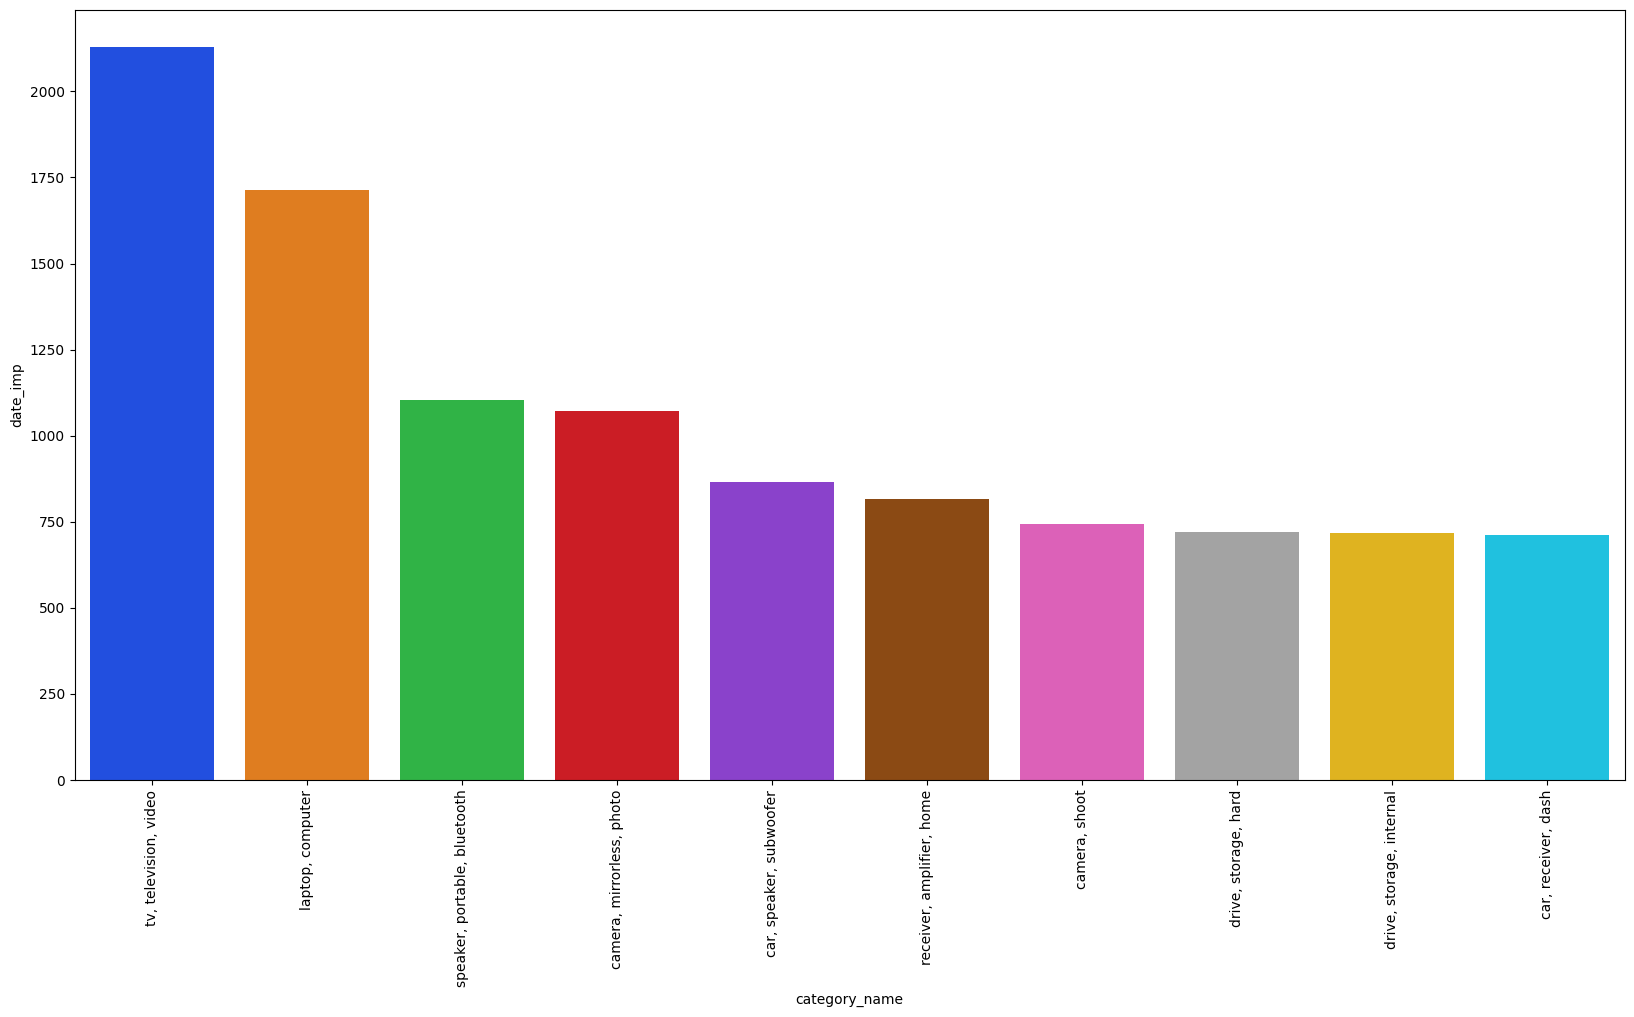

In [17]:
aux2 = df2[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='category_name', y='date_imp',data=aux2.head(10),palette='bright');
plt.xticks(rotation=90);

aux2.head()

### 2.2.2 Categorias mais vendidas por loja

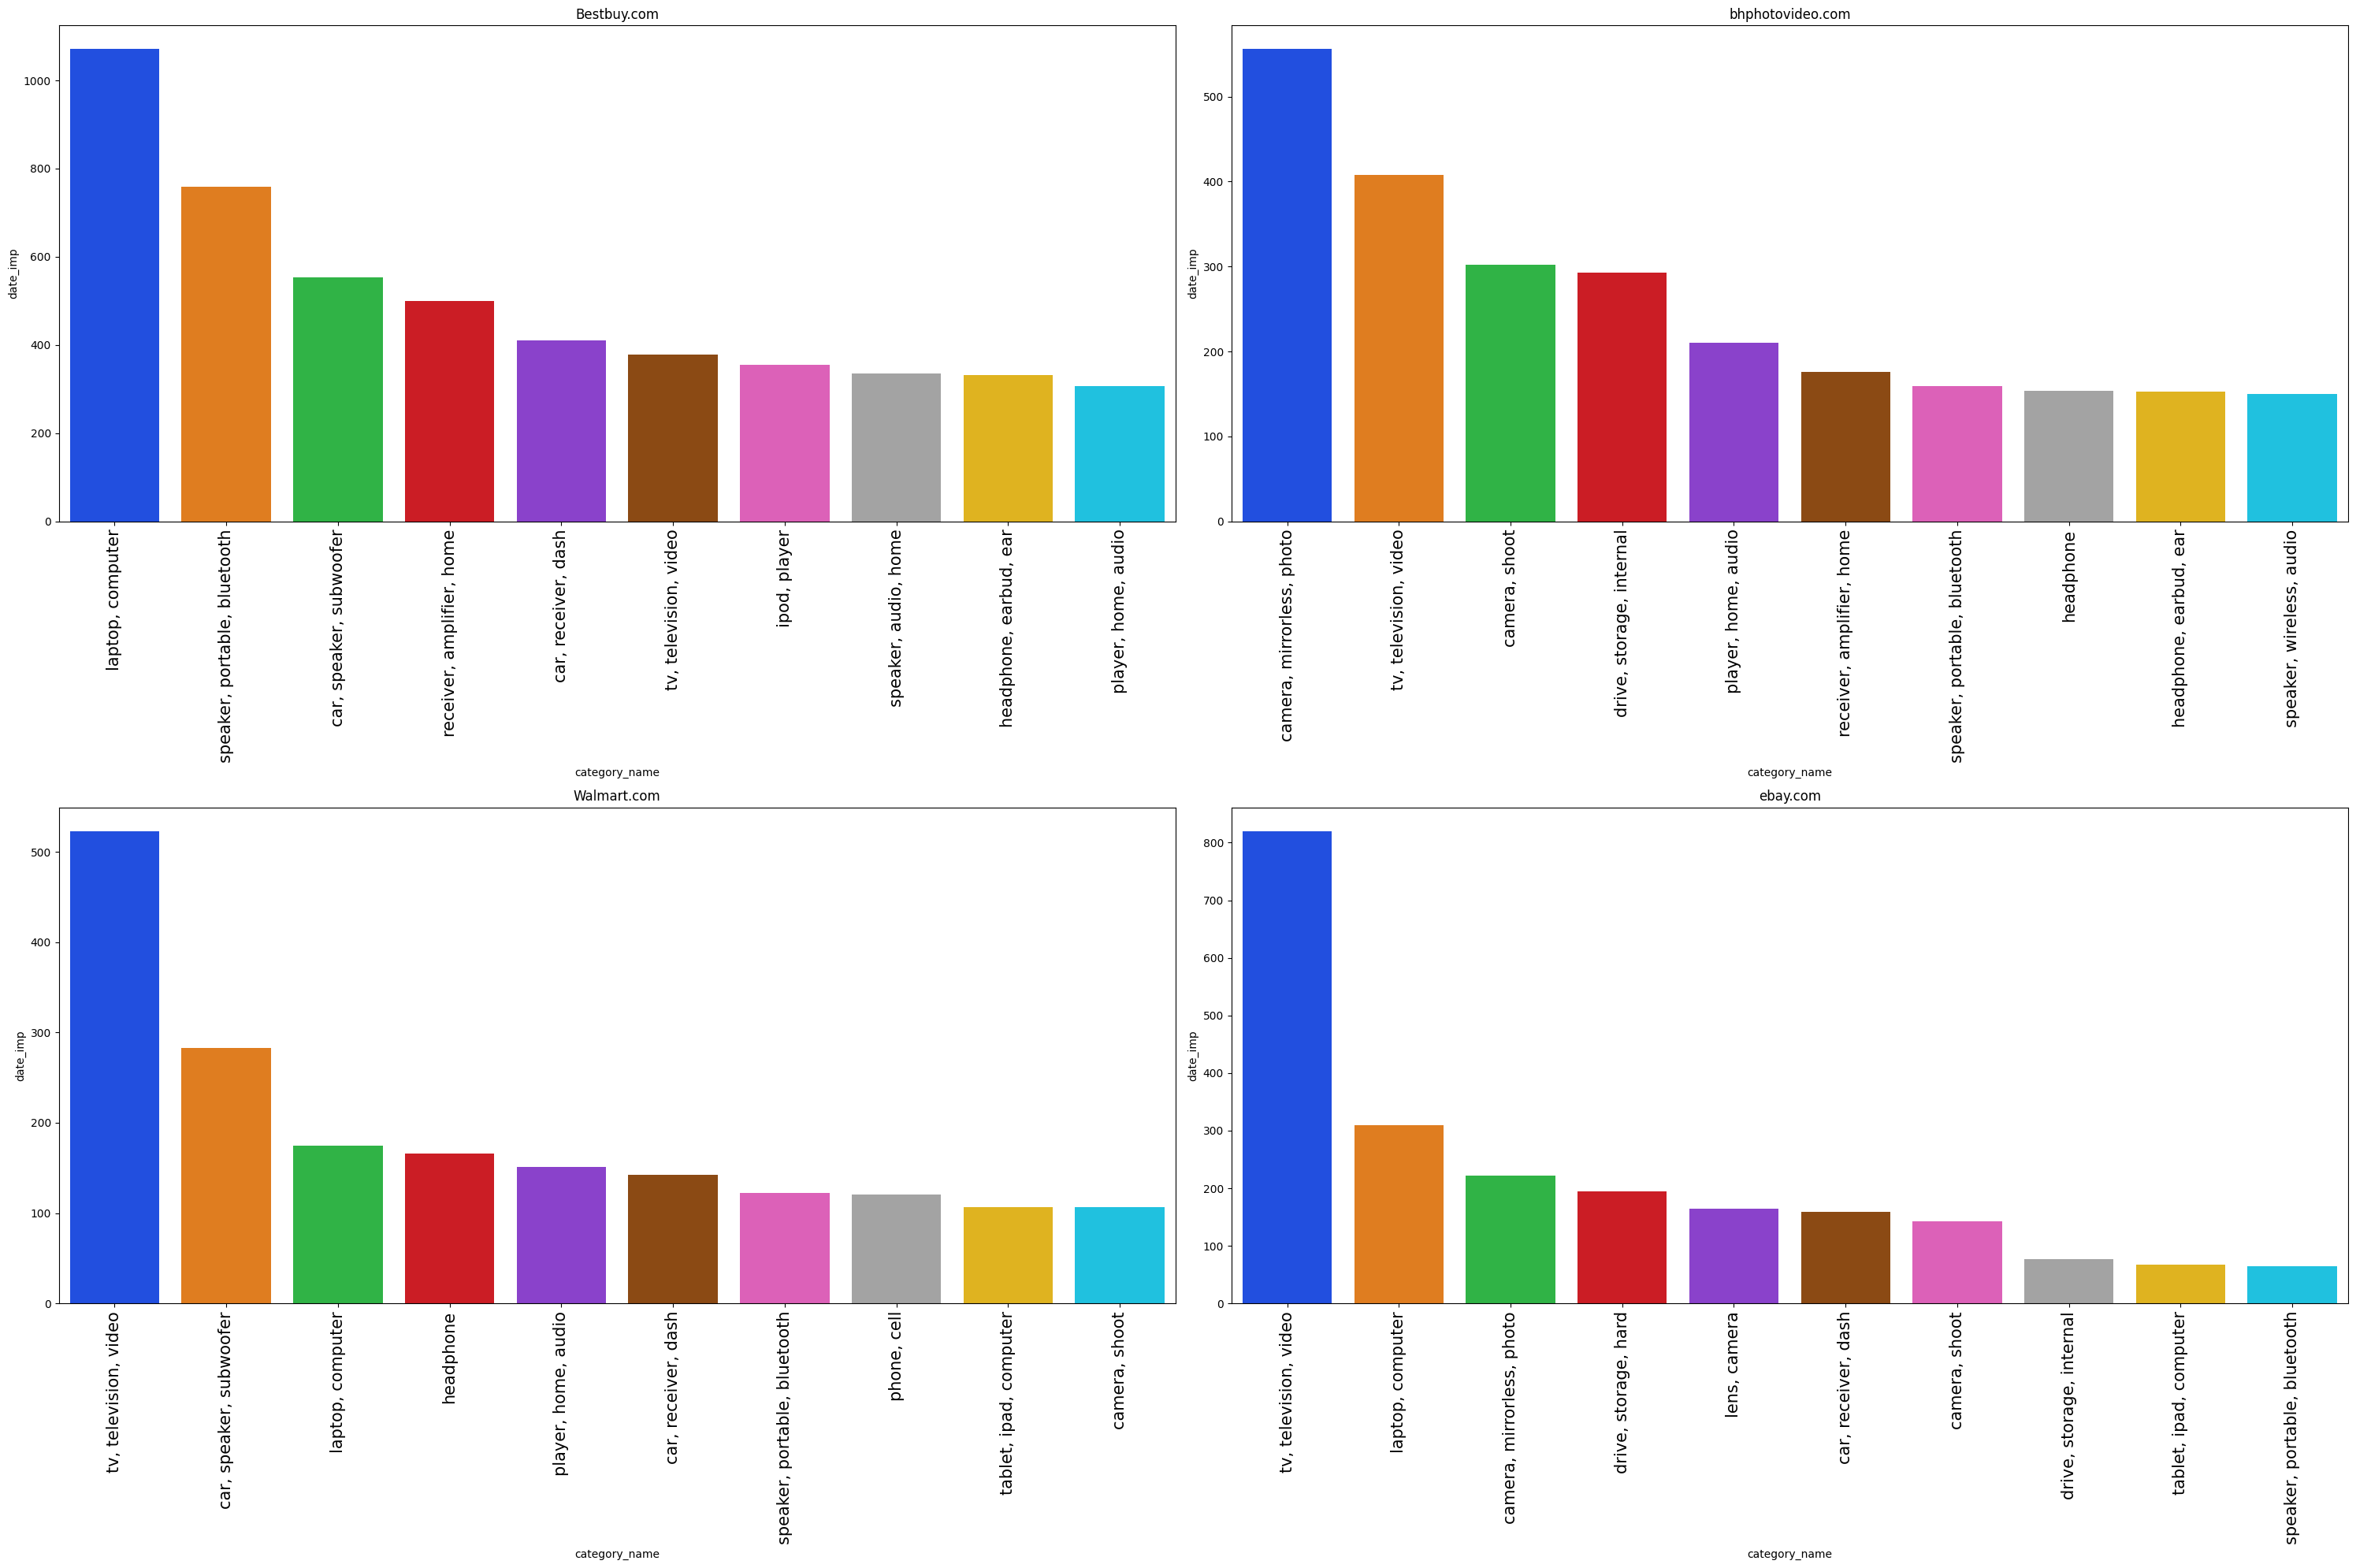

In [18]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux3 = df_best[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux3.head(10),palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=15);

plt.subplot(2,2,2)
aux4 = df_bhp[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux4.head(10),palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=15);

plt.subplot(2,2,3)
aux5 = df_walmart[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux5.head(10),palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=15);

plt.subplot(2,2,4)
aux6 = df_ebay[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux6.head(10),palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=15);

plt.tight_layout();

## 2.3 Qual marca mais vendida?

### 2.3.1 Marcas mais vendidas no geral

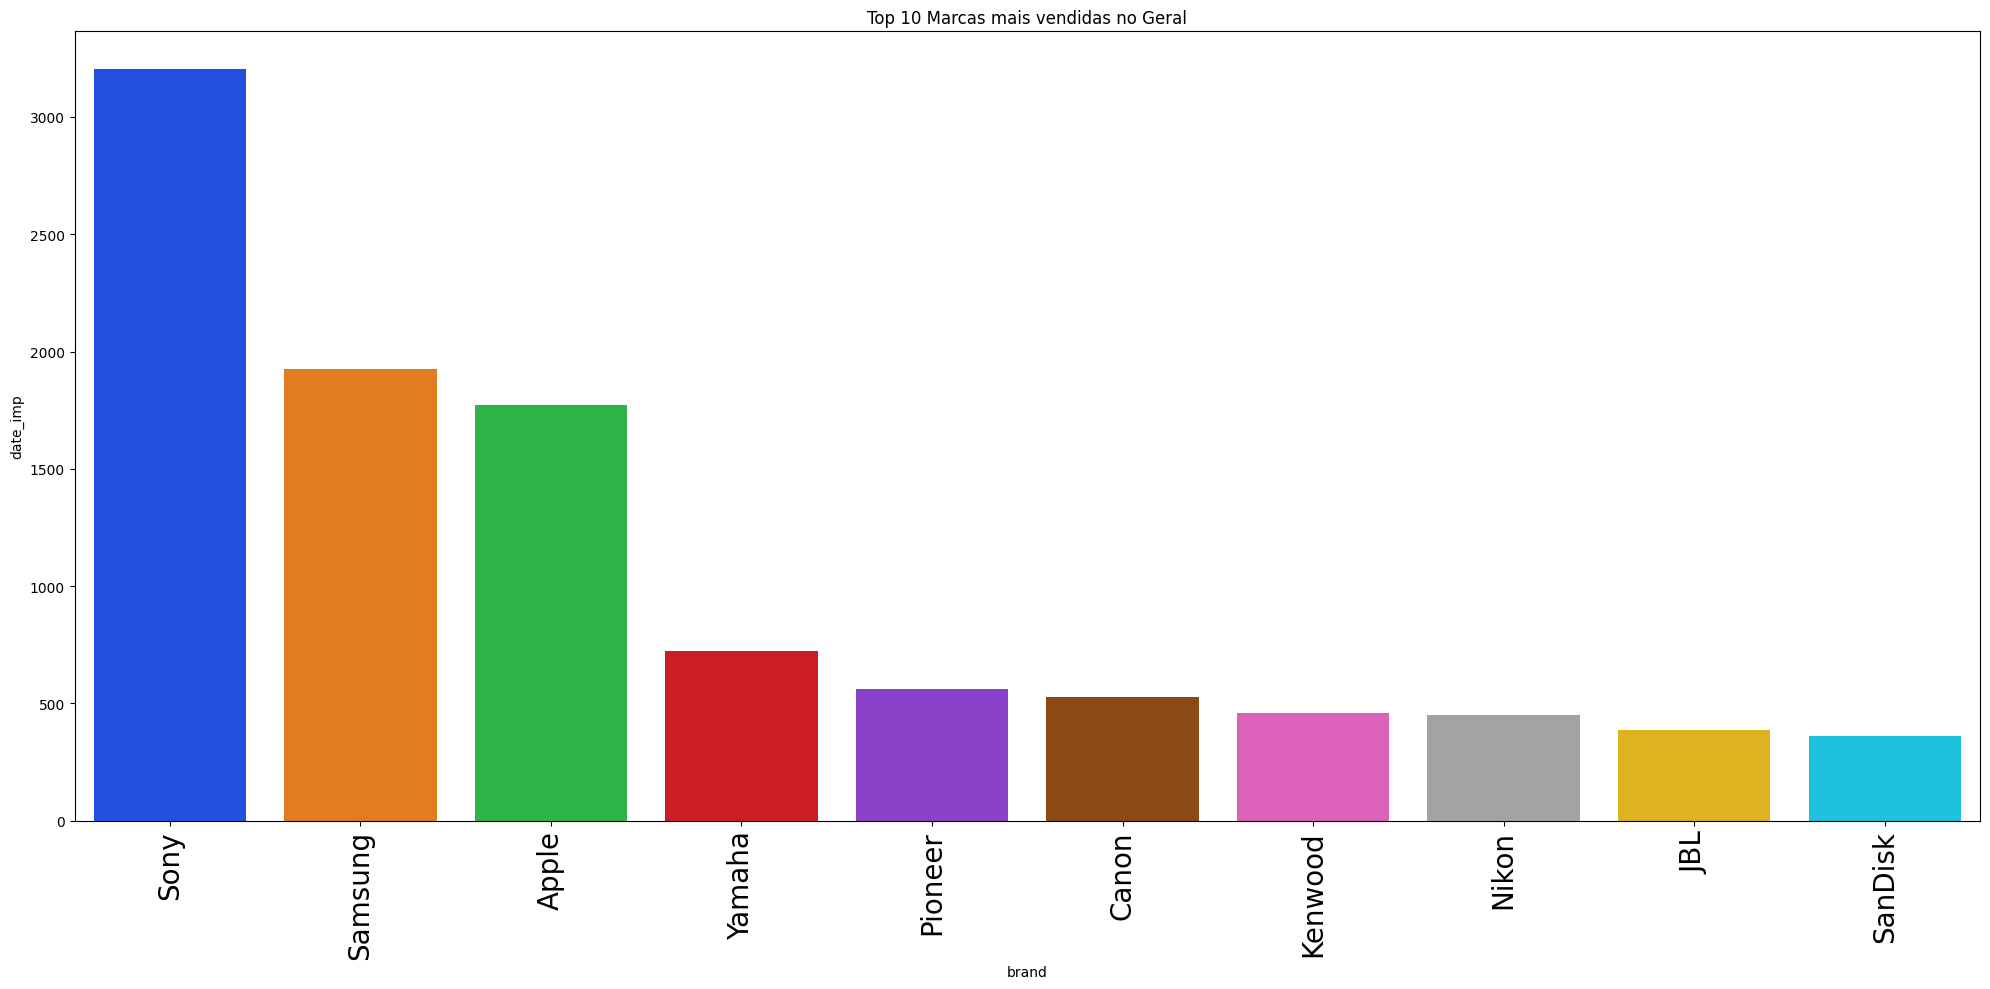

In [19]:
aux7 = df2[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
plt.title('Top 10 Marcas mais vendidas no Geral');
sns.barplot(x='brand', y='date_imp',data=aux7.head(10),palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.3.1 Marcas mais vendidas por loja

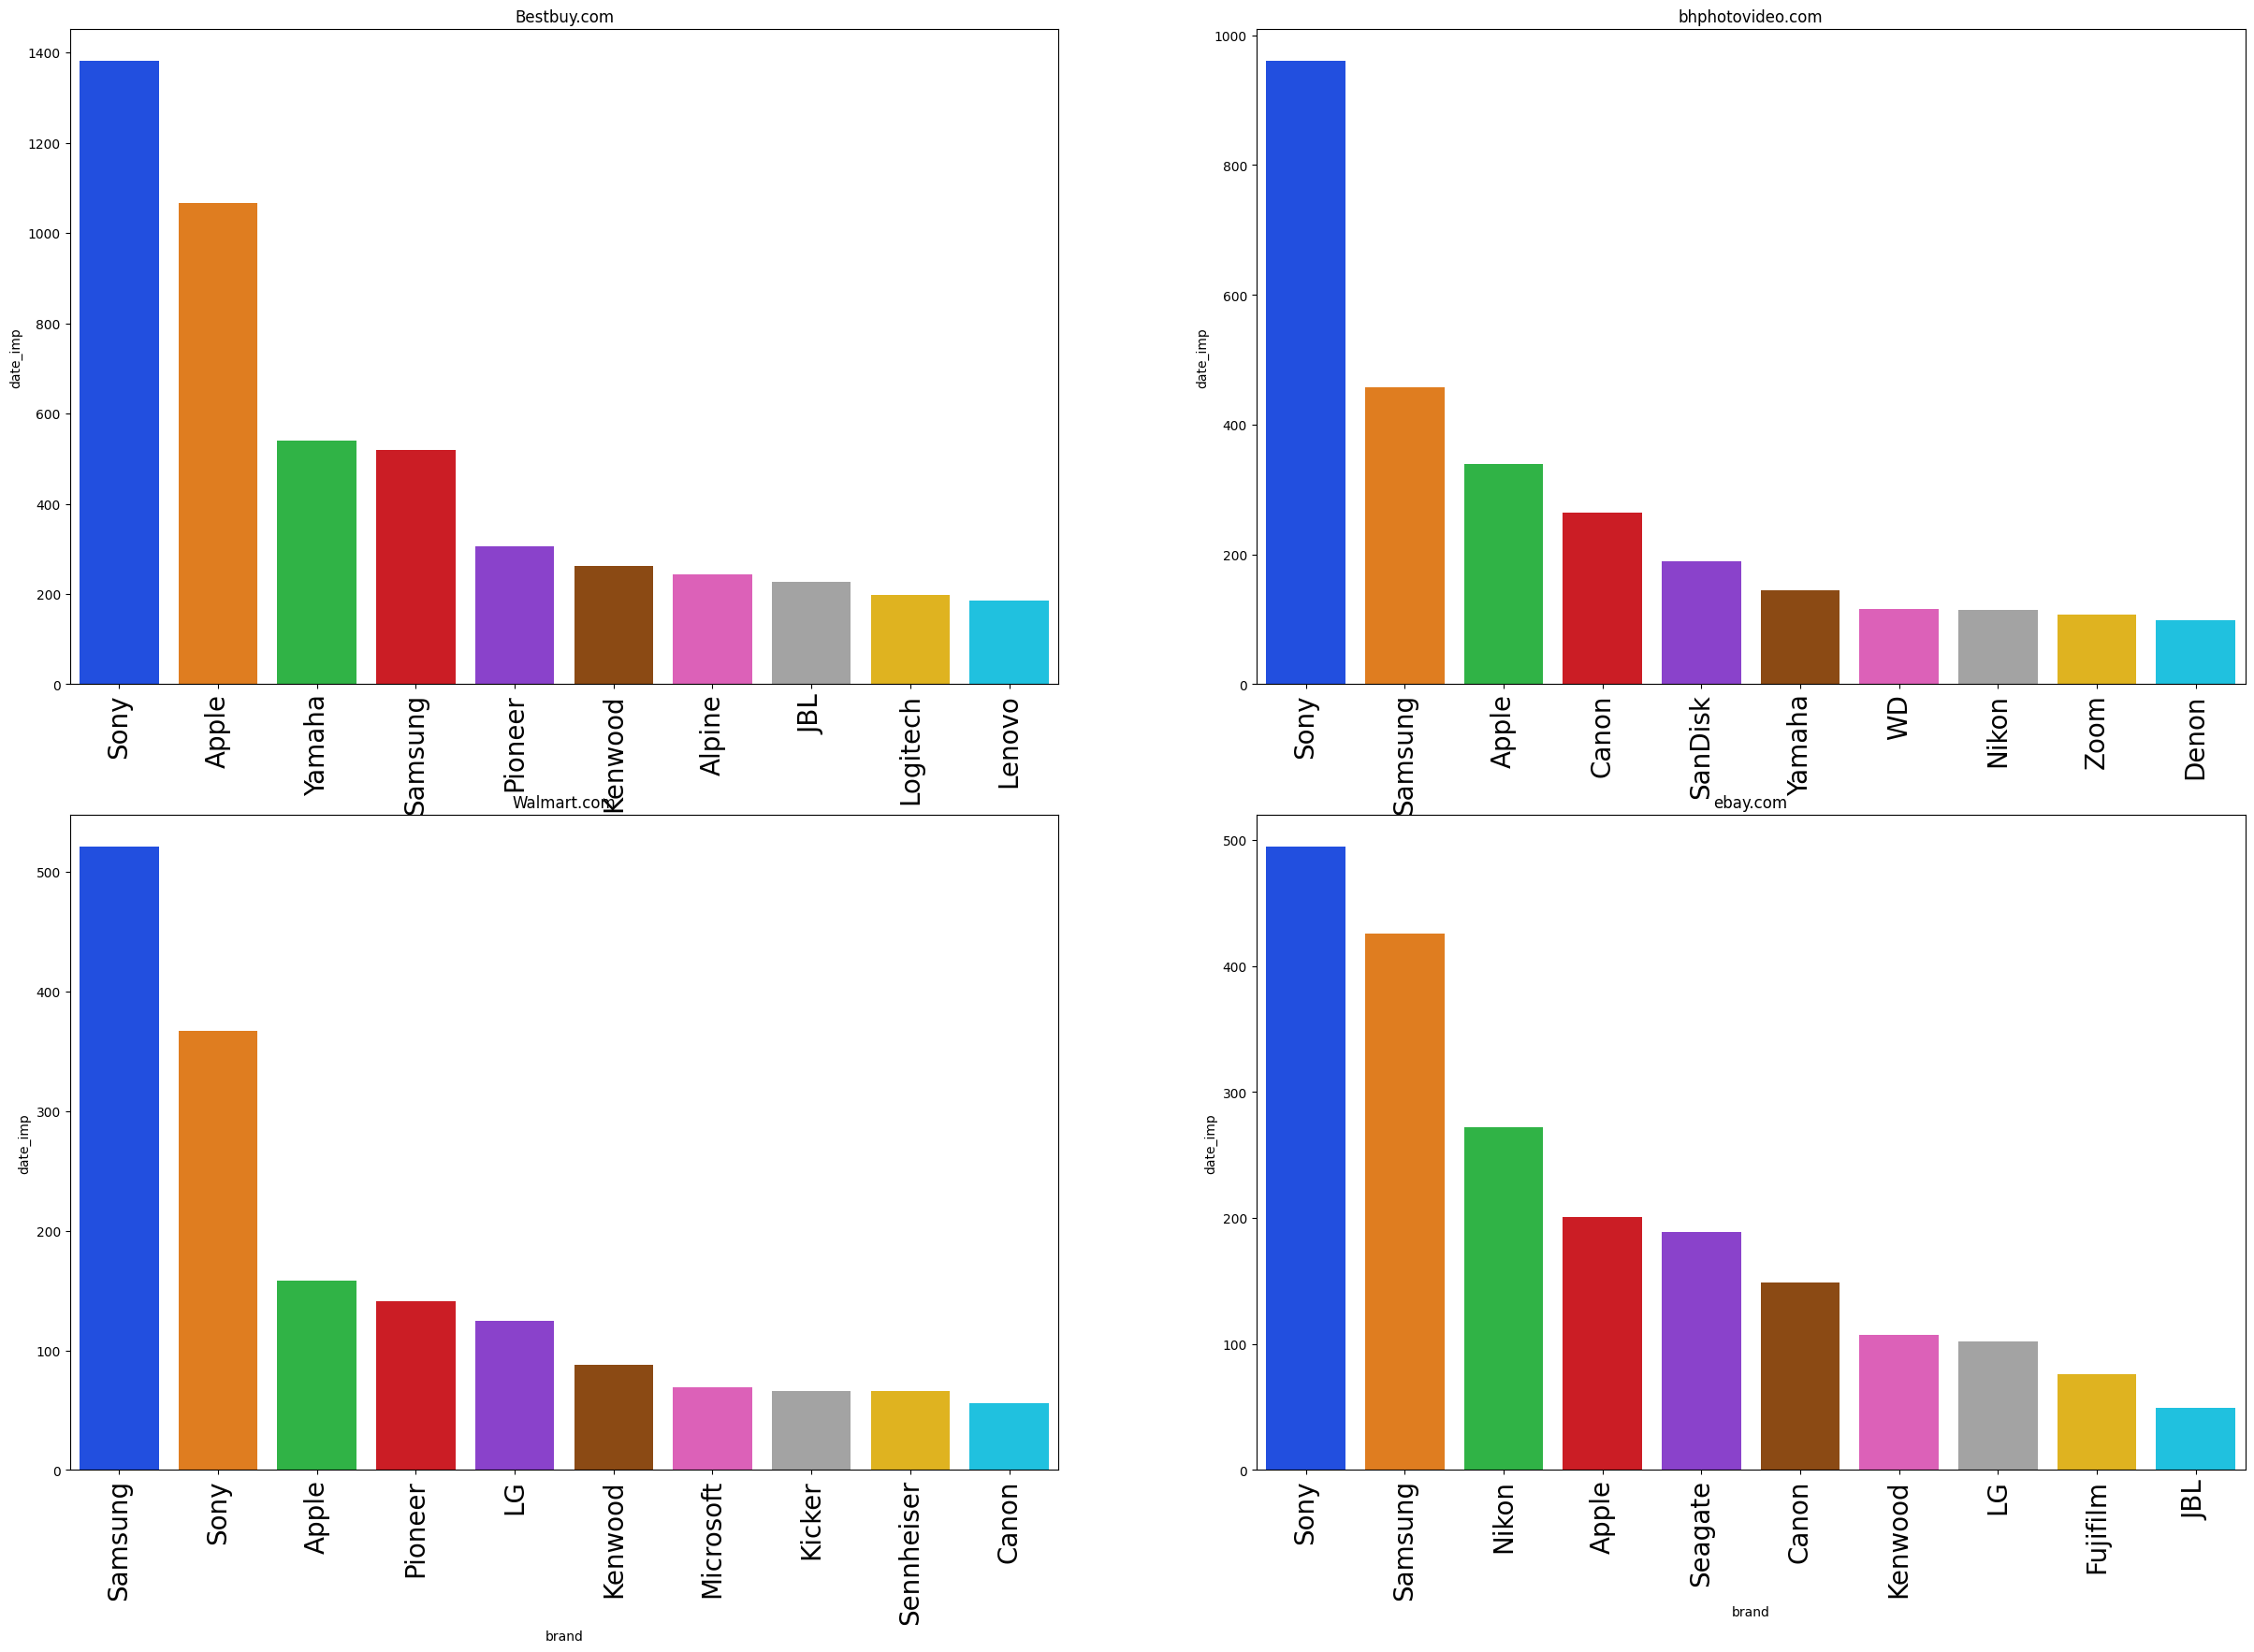

In [20]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux12 = df_best[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux12.head(10),palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux8 = df_bhp[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux8.head(10),palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux9 = df_walmart[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux9.head(10),palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux10 = df_ebay[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux10.head(10),palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

## 2.4 Quais os dias que mais vendem?

### 2.4.1 Quais os dias que mais vendem no geral?

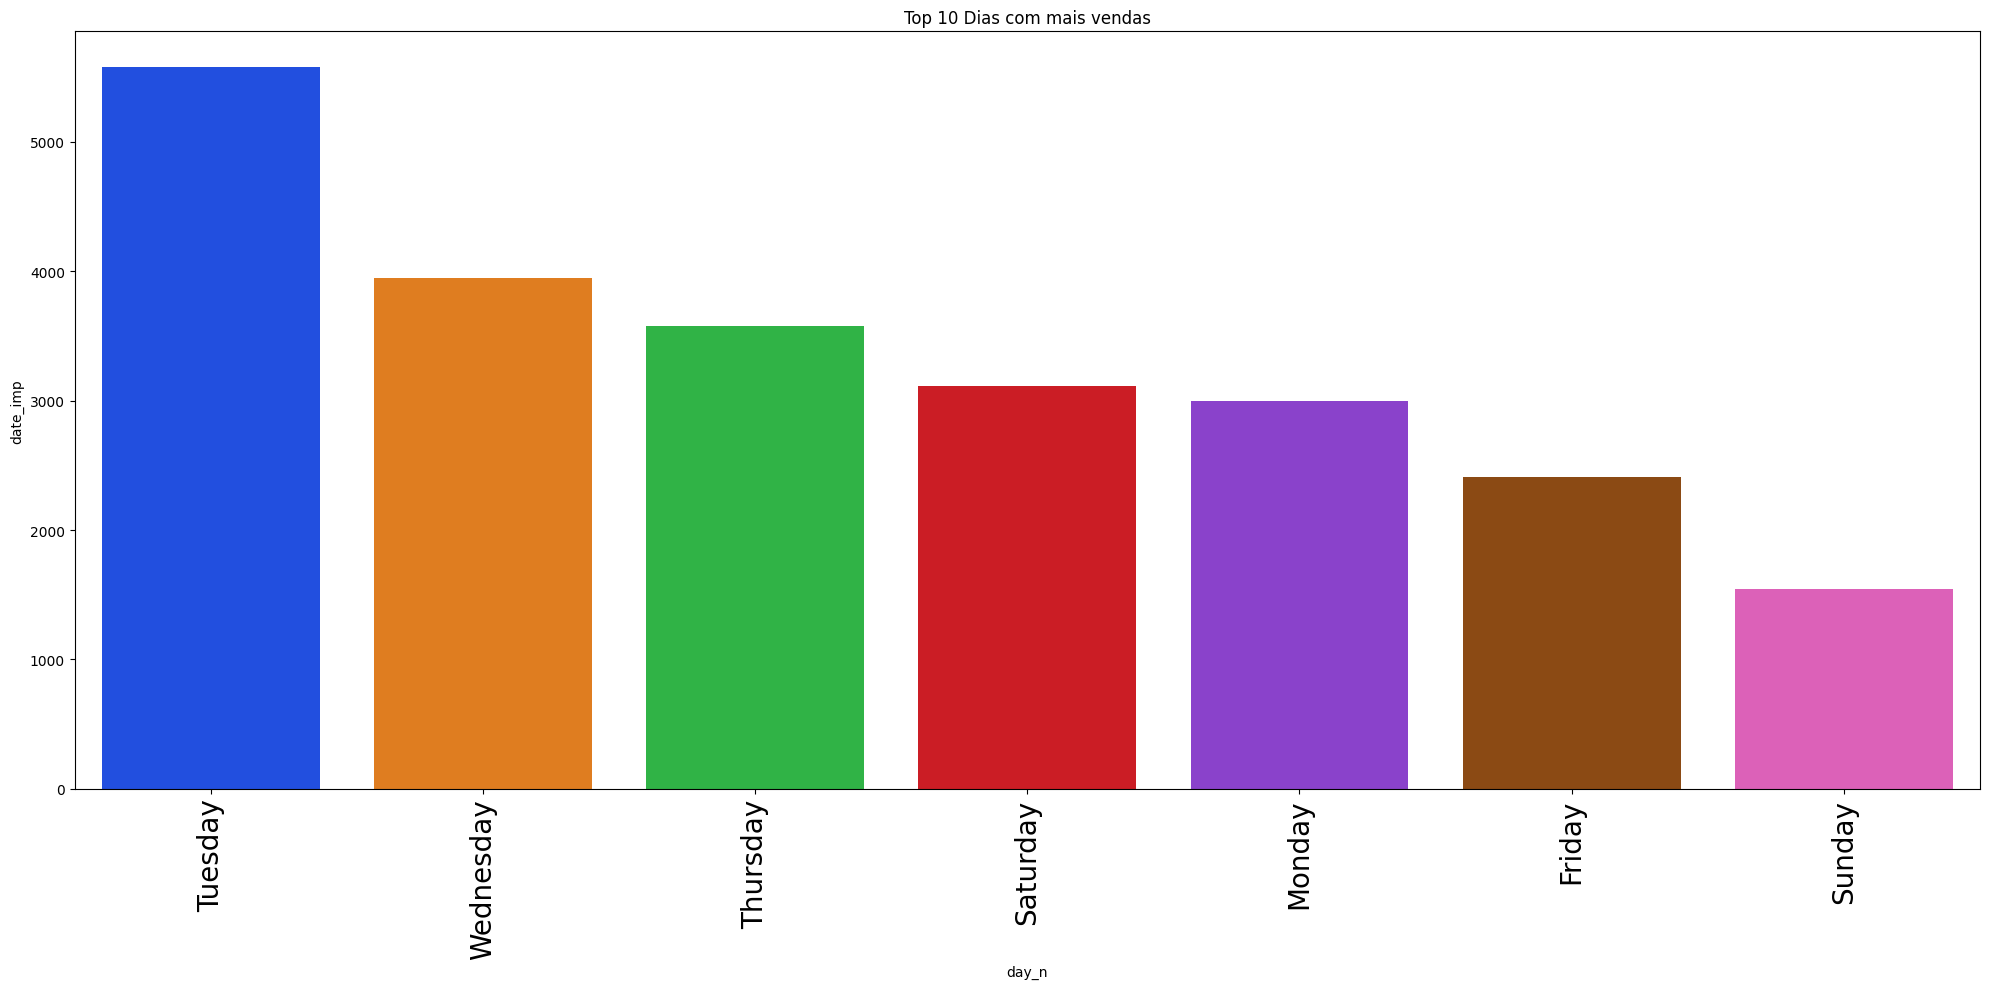

In [21]:
aux13 = df2[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
plt.title('Top 10 Dias com mais vendas');
sns.barplot(x='day_n', y='date_imp',data=aux13,palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.4.2 Quais os dias que mais vendem por loja?

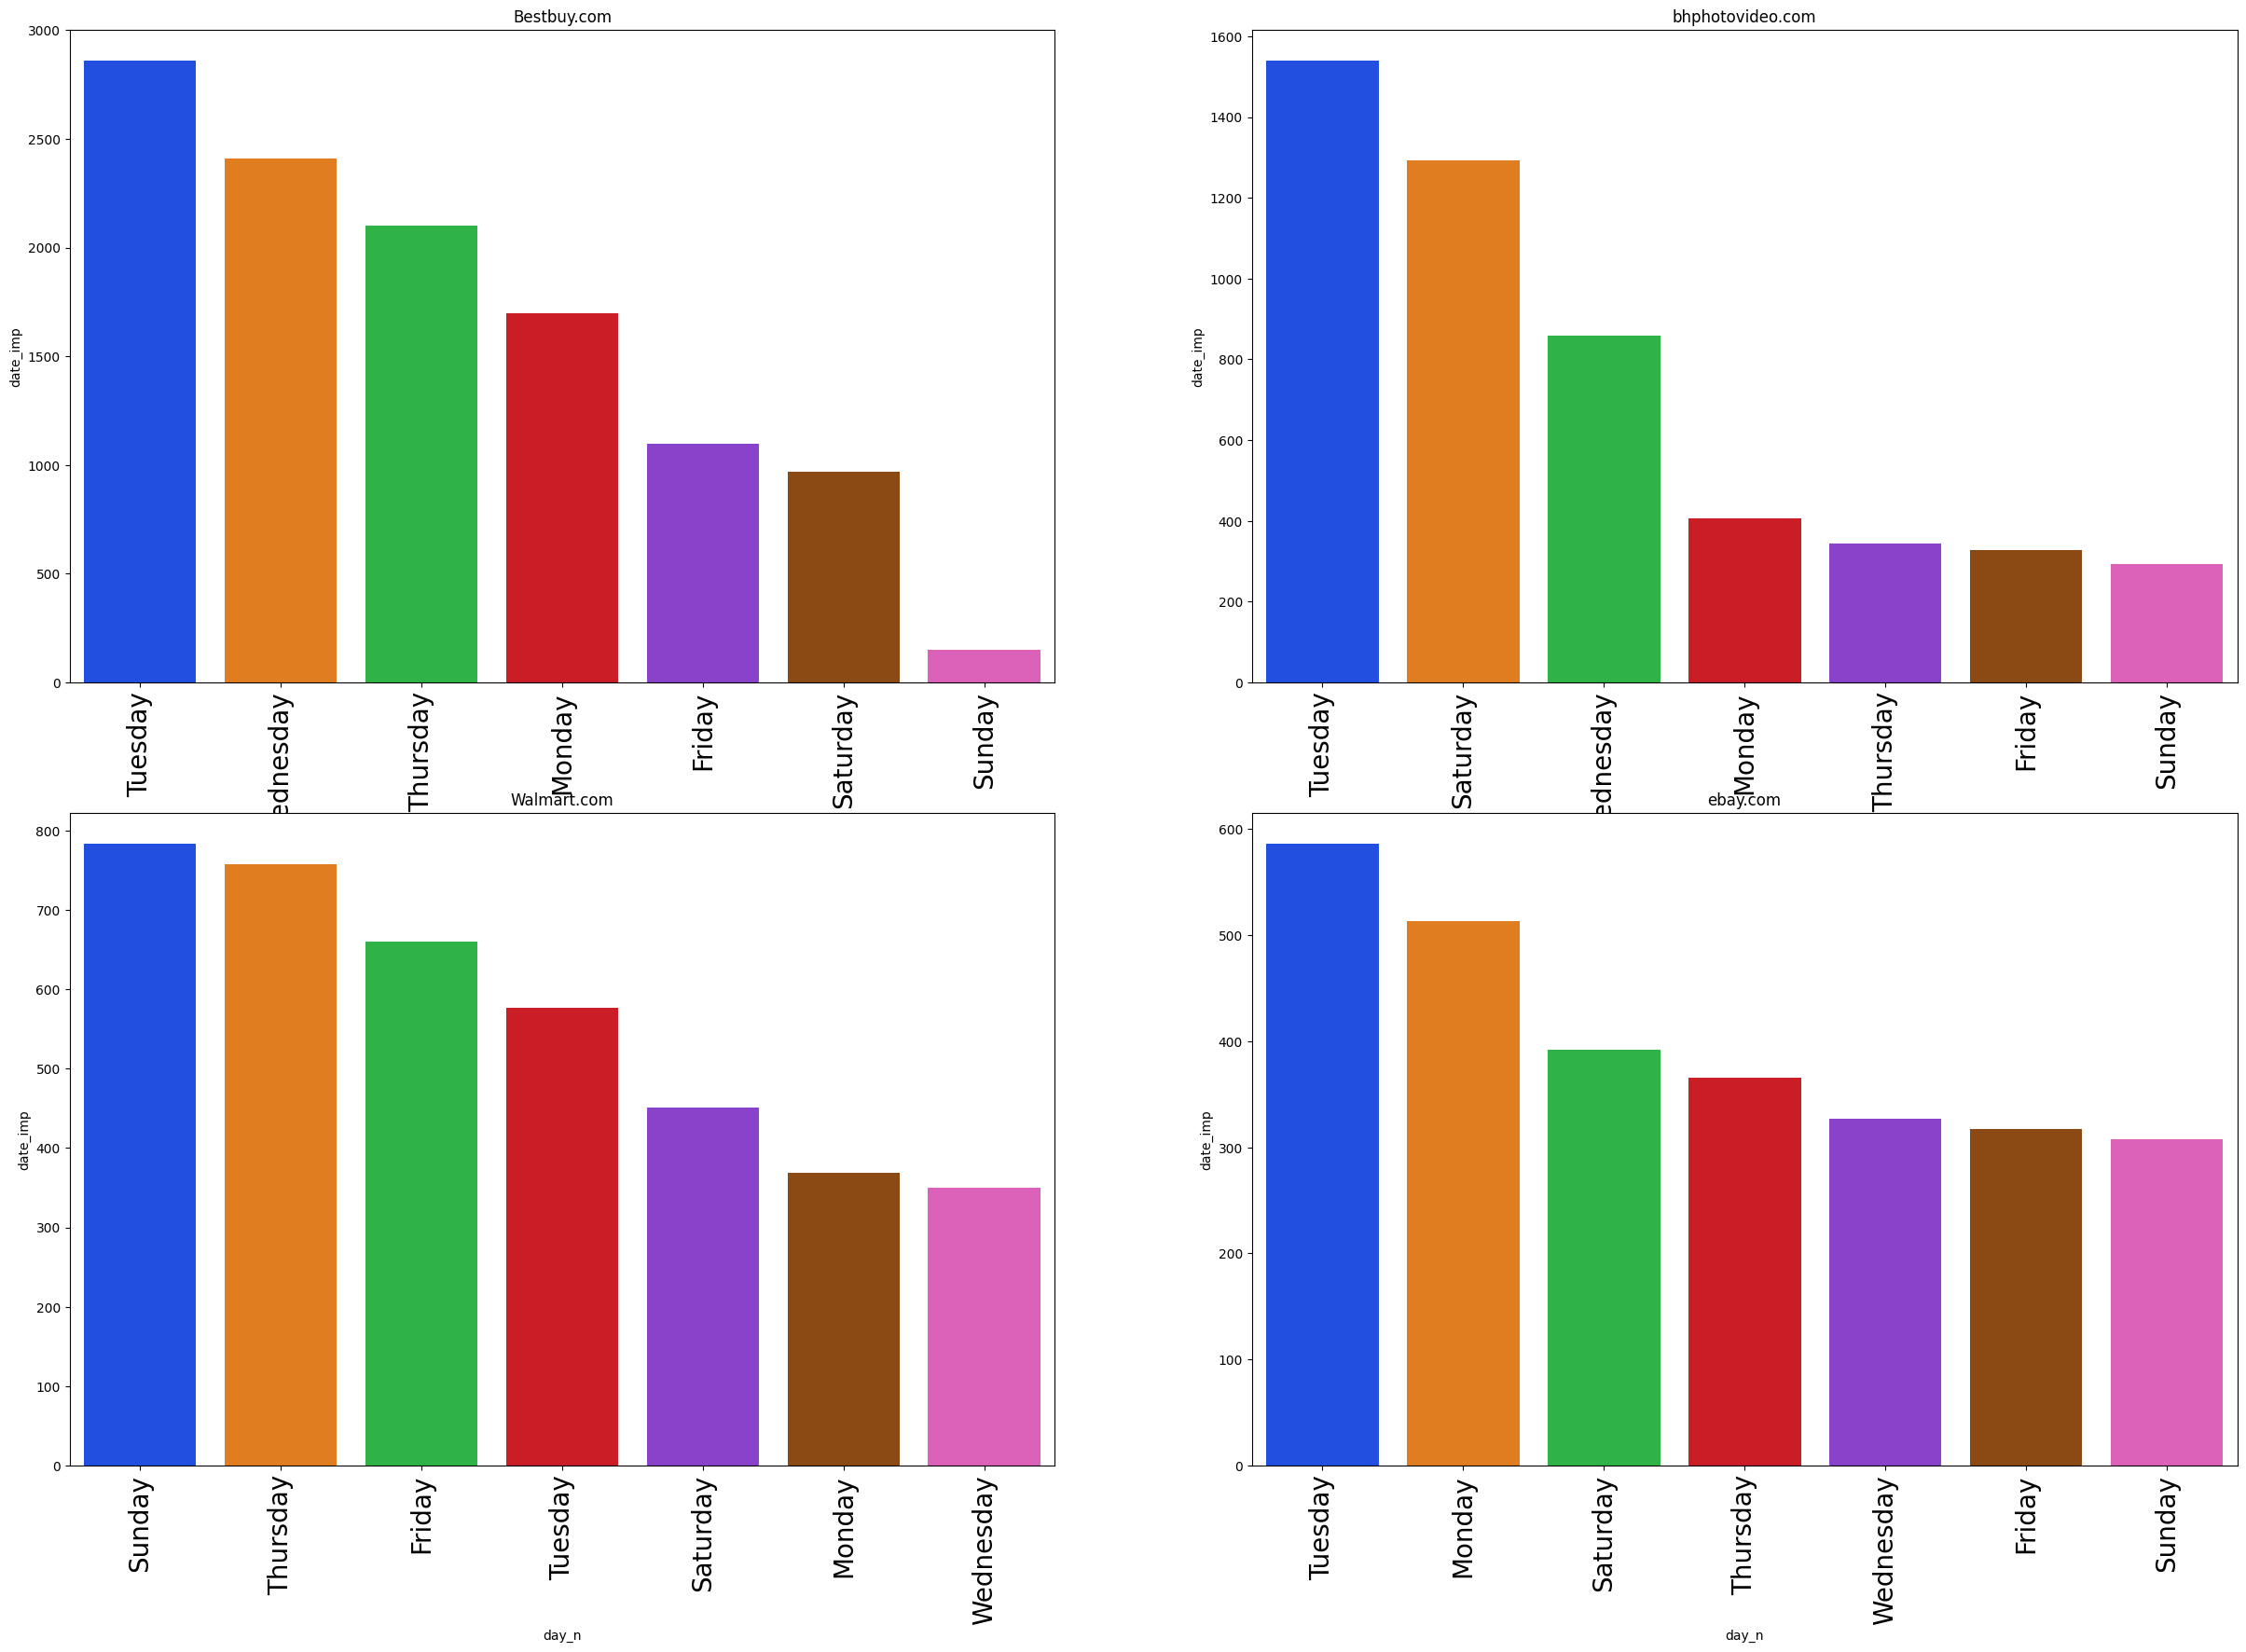

In [22]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux14 = df_best[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux14.head(10),palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux15 = df_bhp[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux15.head(10),palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux16 = df_walmart[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux16.head(10),palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux17 = df_ebay[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux17.head(10),palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

## 2.5 Quais os meses que mais vendem?

### 2.5.1 Quais os meses que mais vendem no geral?

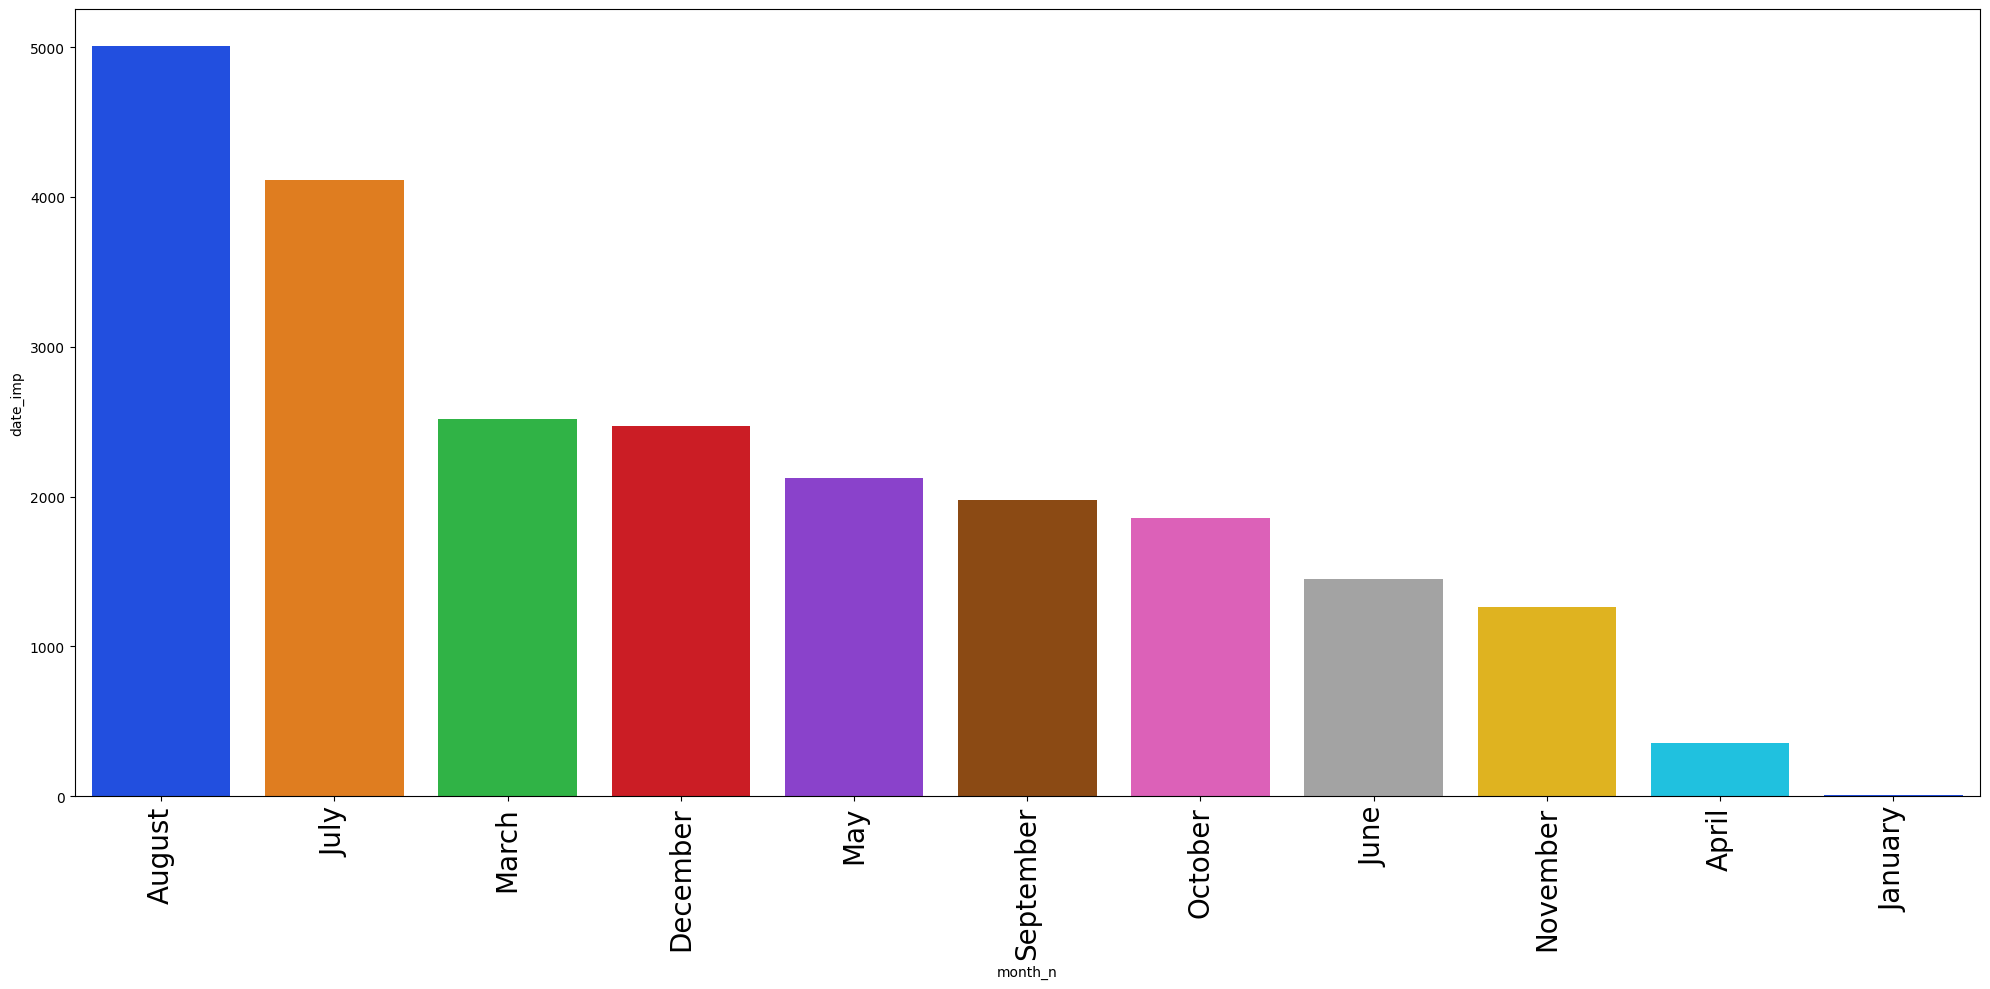

In [23]:
aux18 = df2[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='month_n', y='date_imp',data=aux18,palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.5.2 Quais os meses que mais vendem por loja?

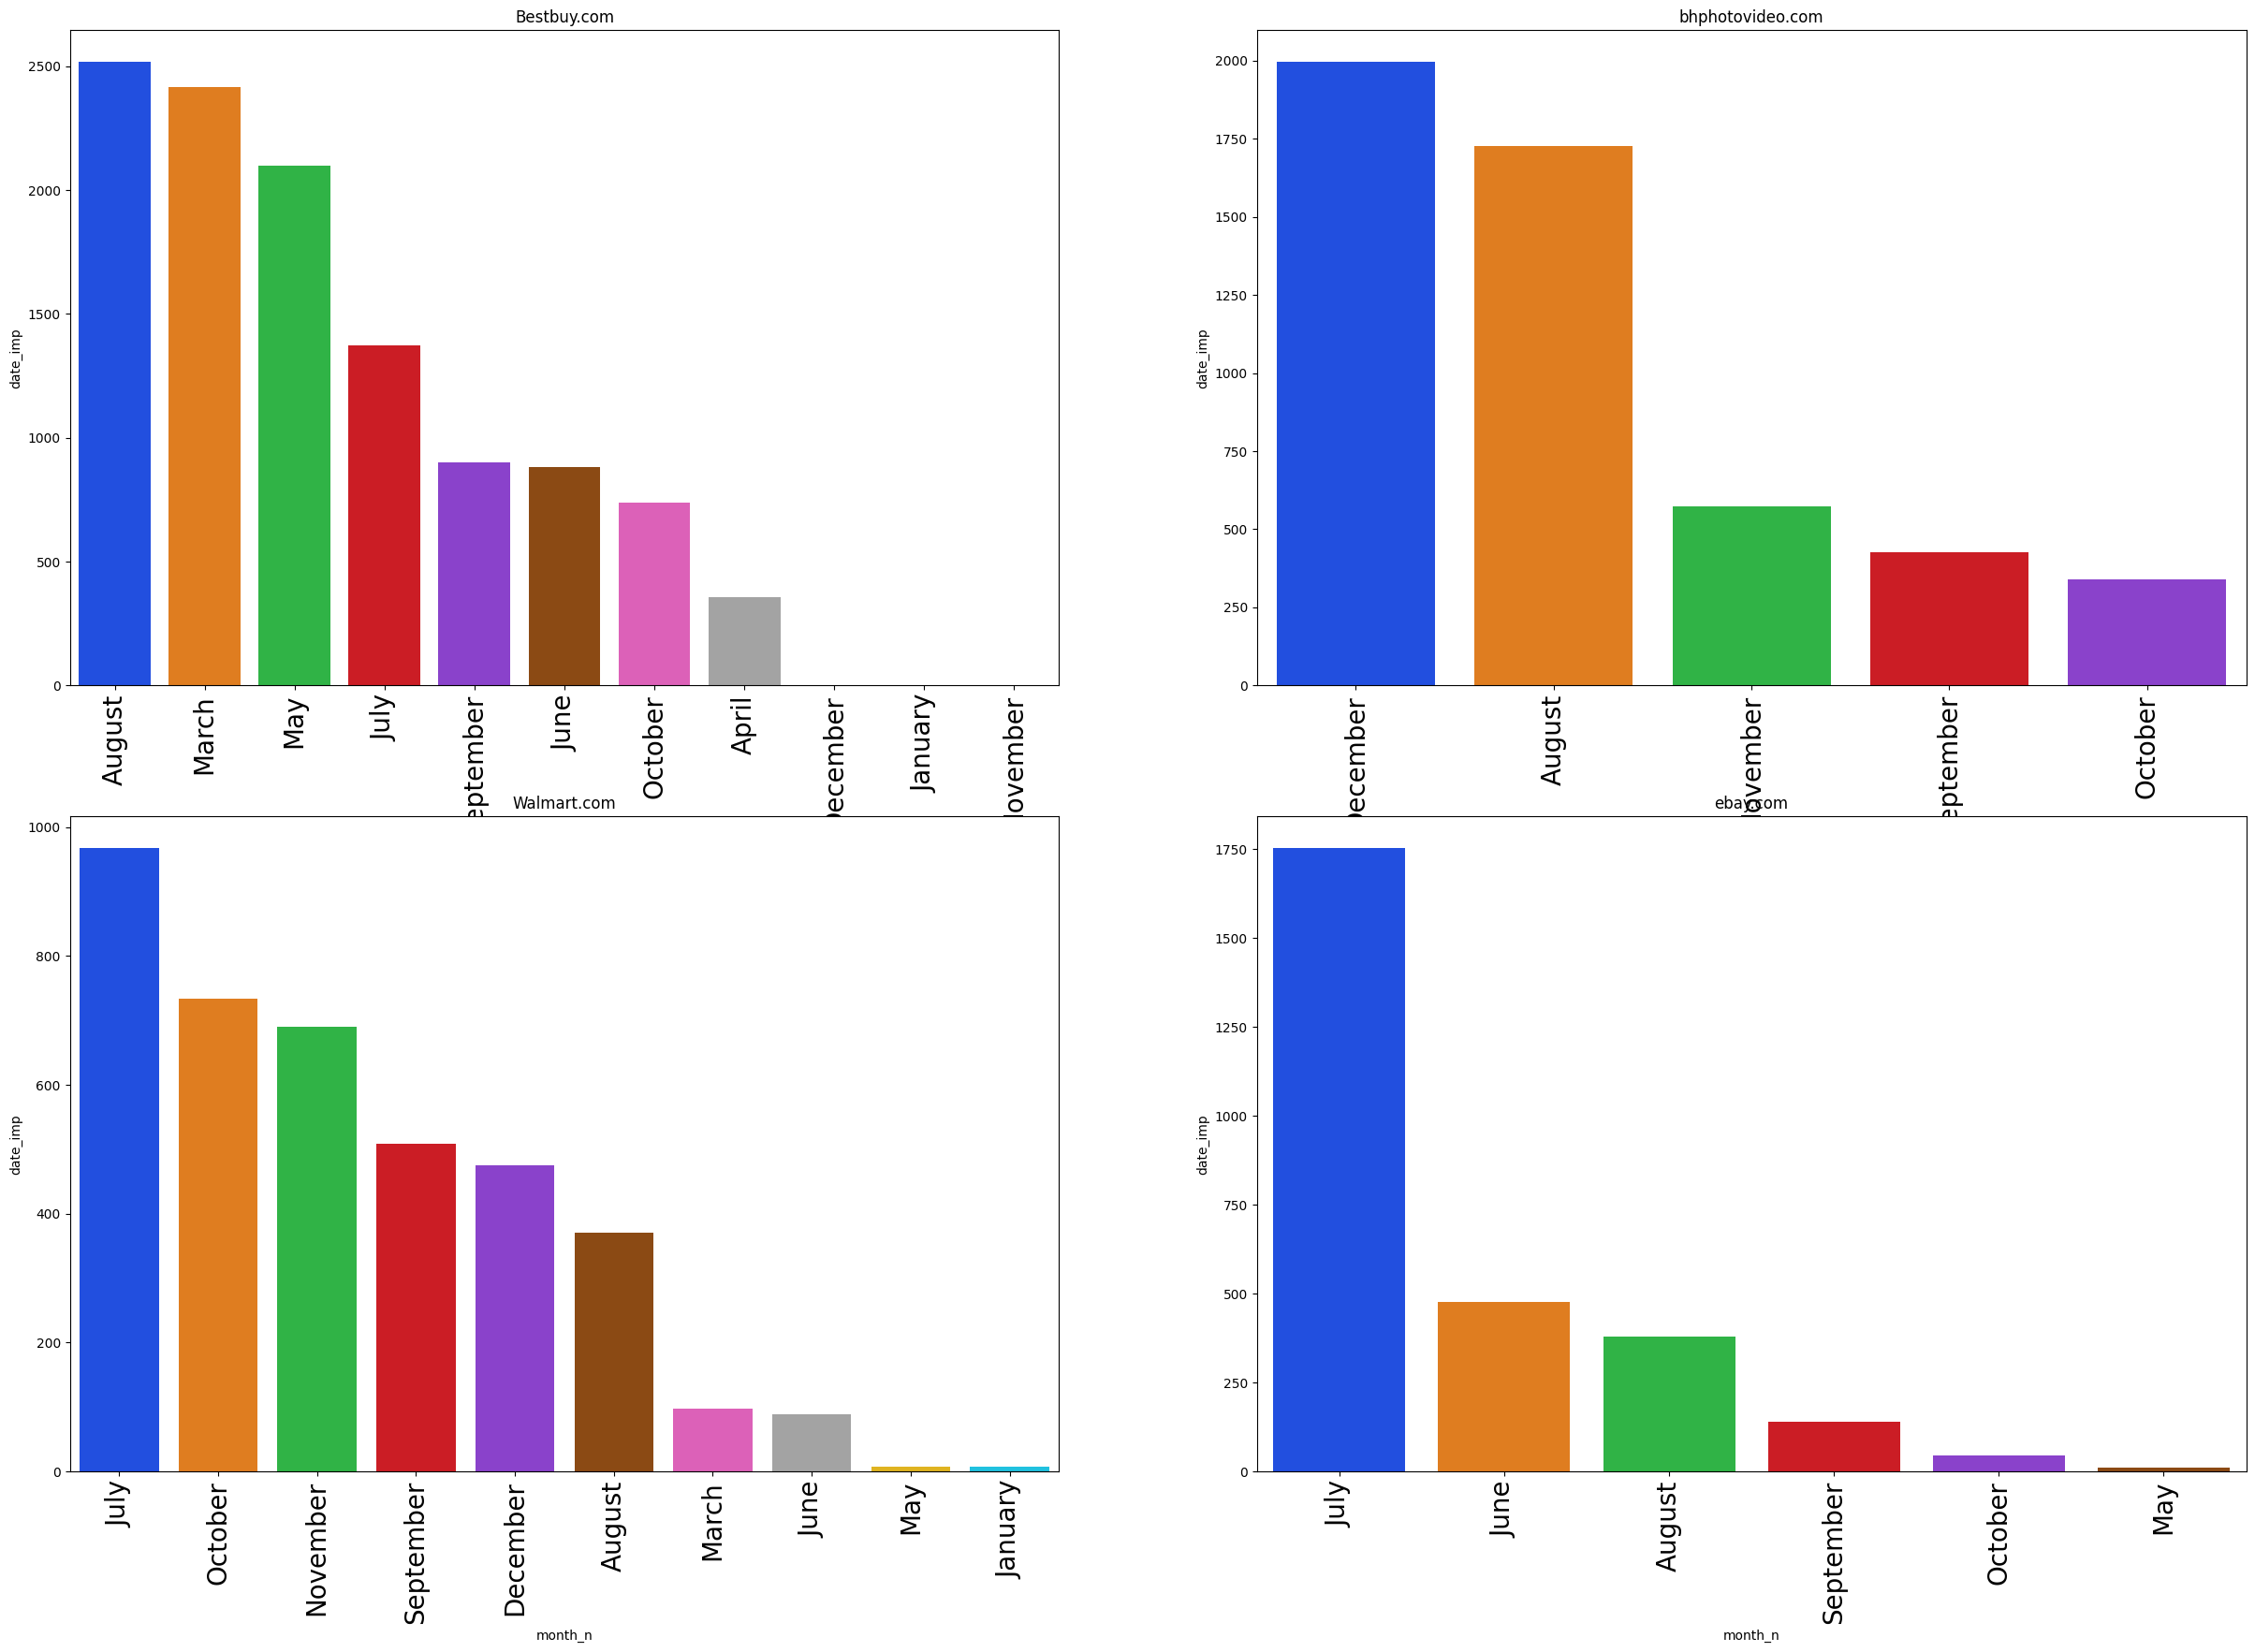

In [24]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux19 = df_best[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux19,palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux20 = df_bhp[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux20,palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux21 = df_walmart[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux21,palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux22 = df_ebay[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux22,palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

## 2.6 Quais as semanas que mais vendem?

### 2.6.1 Quais as semanas que mais vendem no geral?

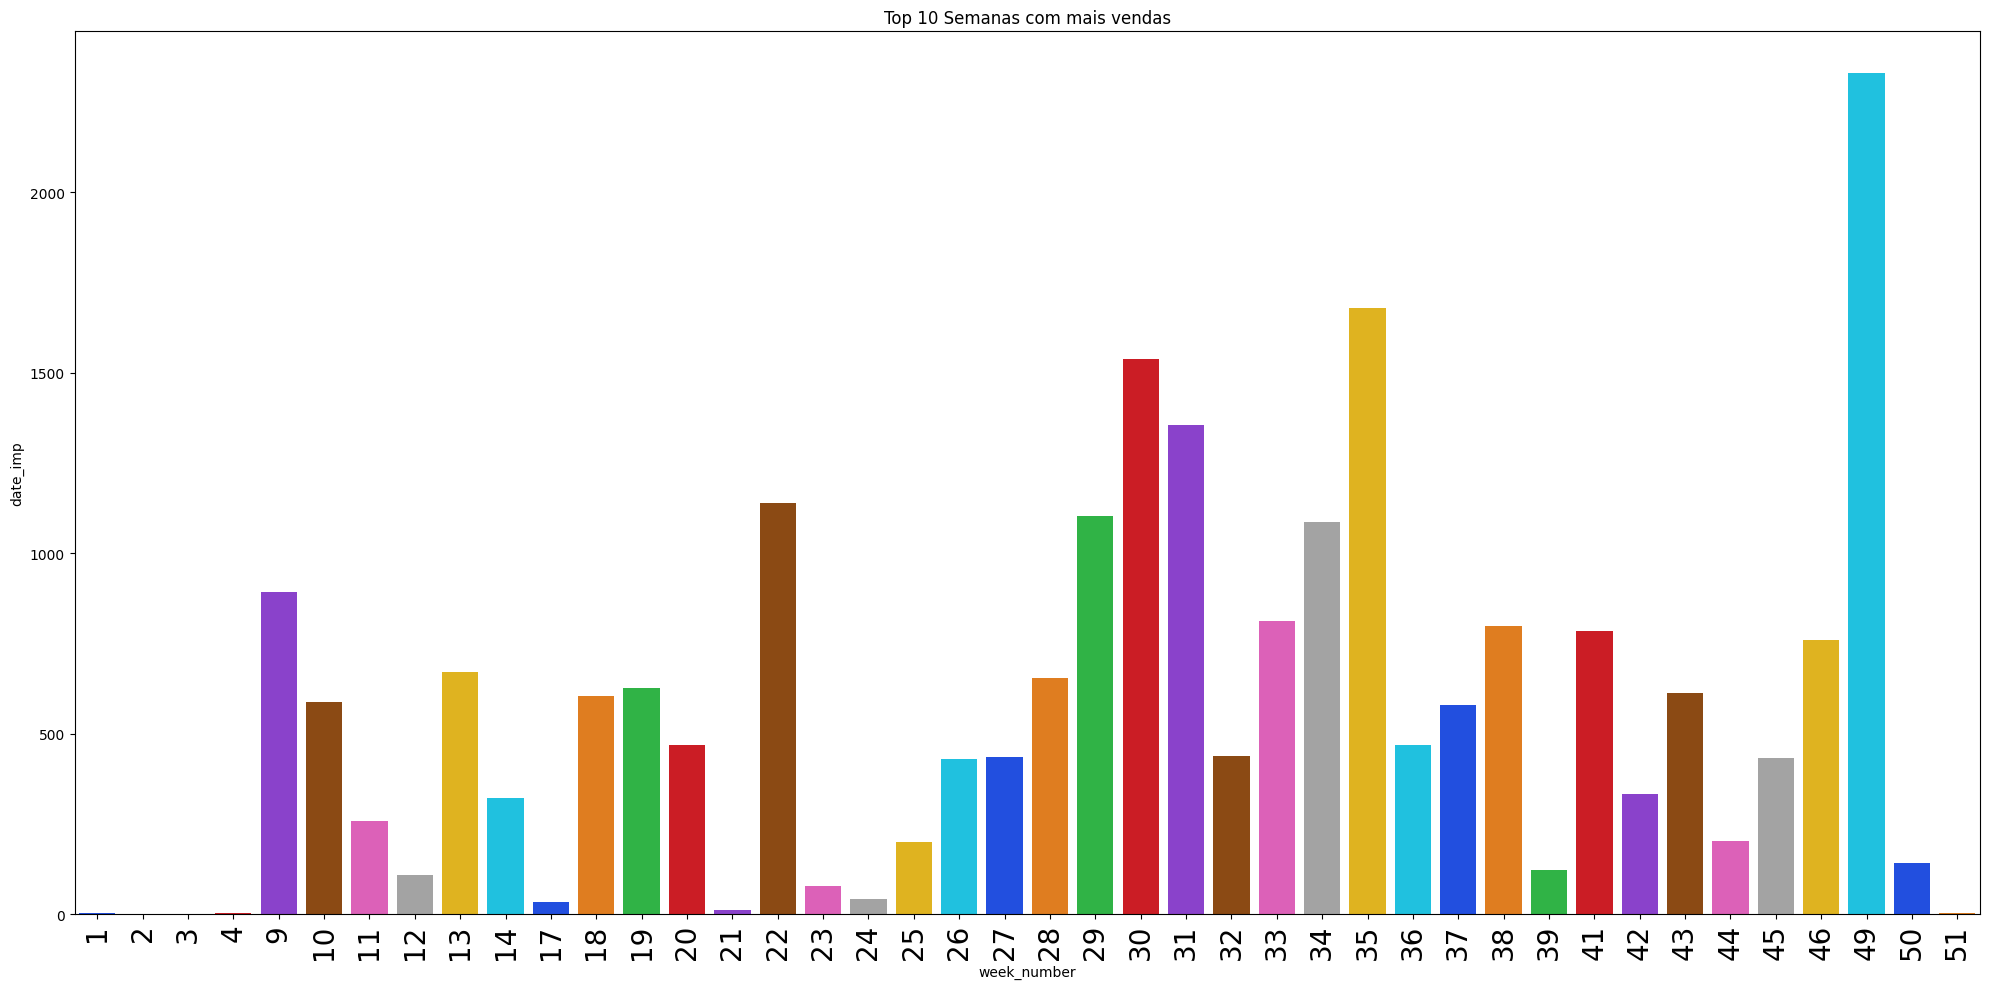

In [25]:
aux23 = df2[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
plt.title('Top 10 Semanas com mais vendas');
sns.barplot(x='week_number', y='date_imp',data=aux23,palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.6.2 Quais as semanas que mais vendem por loja?

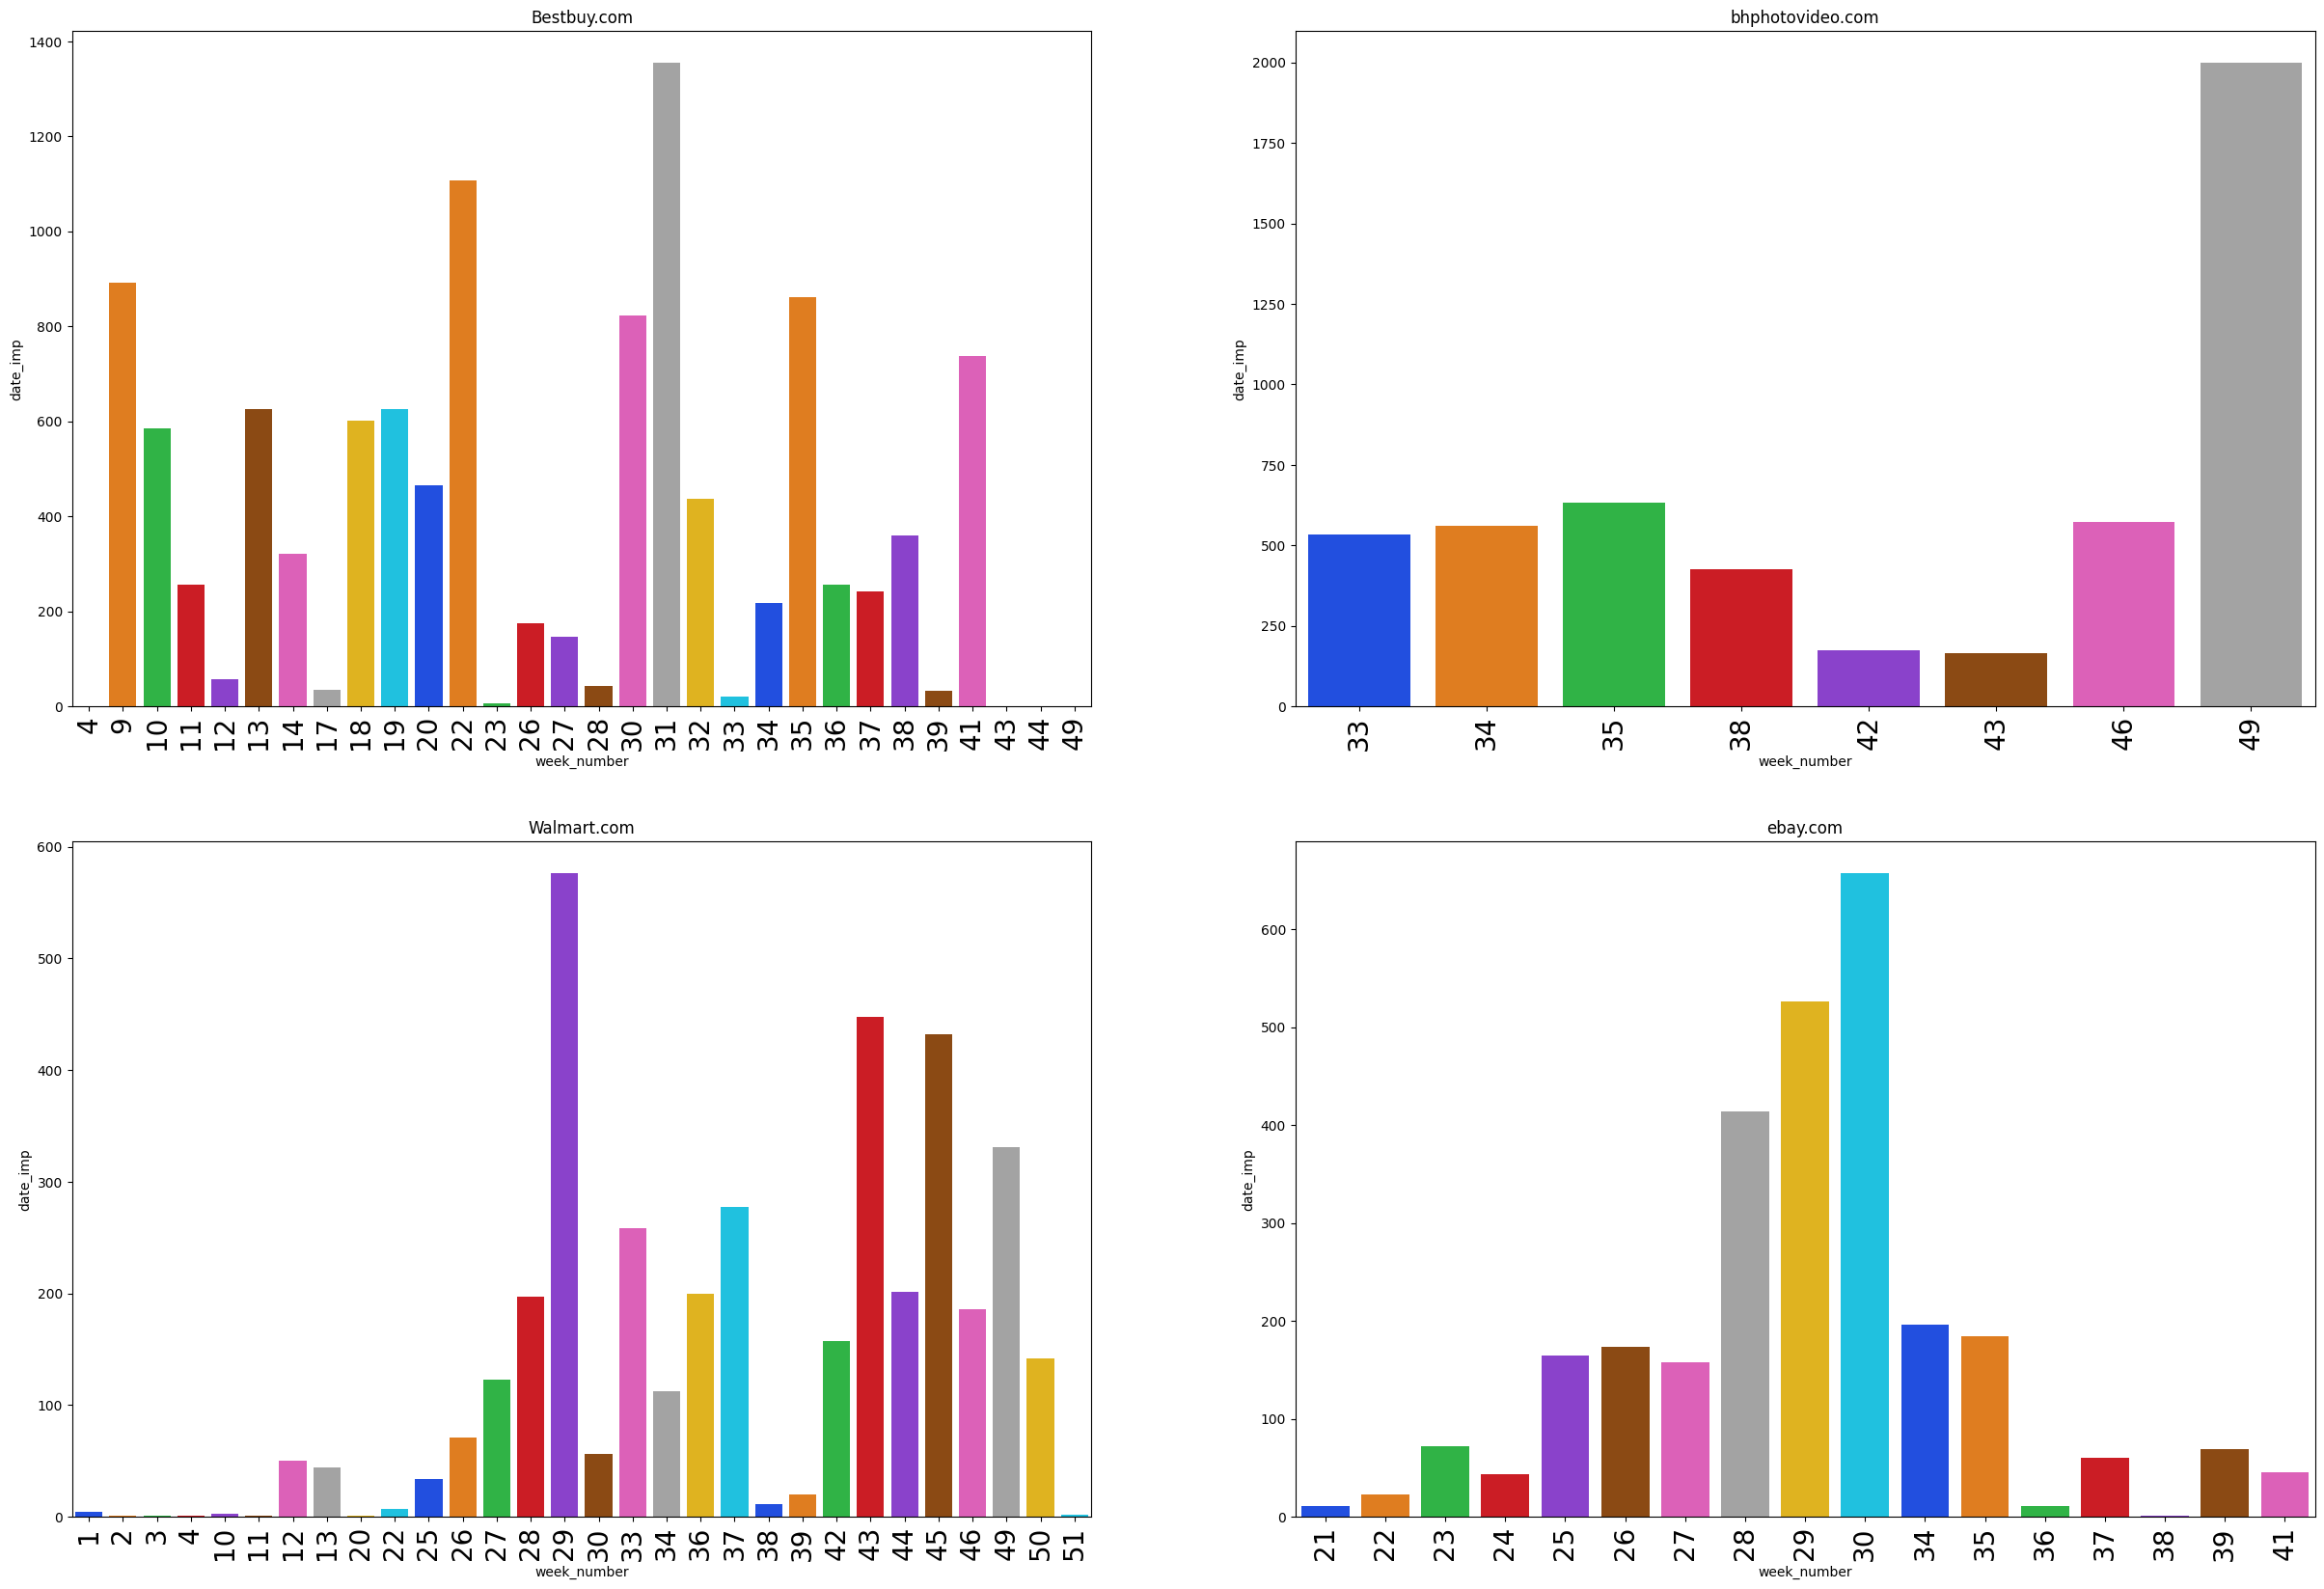

In [26]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux24 = df_best[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux24,palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux25 = df_bhp[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux25,palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux26 = df_walmart[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux26,palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux27 = df_ebay[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux27,palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

# 3.0 Feature Engenireeng

In [20]:
df3 = df2.copy()

## 3.1 Categoria mais vendida da Bestbuy.com

In [21]:
df_laptop = df_best.loc[df_best['category_name'] == 'laptop, computer',:]

In [22]:
#Check NA
df_laptop.isna().sum()

date_imp             0
category_name        0
name                 0
price                0
disc_price           0
merchant             0
disc_percentage      0
is_sale              0
imp_count            0
brand                0
p_description        0
date_added           0
date_seen            0
date_updated         0
manufacturer       627
day_n                0
month                0
month_n              0
day                  0
week_number          0
dtype: int64

In [23]:
#Usou o disc_price pois foi o preço vendido na realidade, e faz-e a média do período
#No dataset, cada venda é uma linha, por isso conta-se o data_imp
test = df_laptop.groupby(['name','week_number']).agg({'disc_price':'mean','date_imp':'count'}).reset_index()
test.head()

#Precisamos então da média dos preços do período, podendo ser dia, semana ou mês e a quantidade do item vendido nesse período

name  week_number  disc_price  date_imp
0  12 MacBook (Mid 2017, Gold)           30     1599.99         1
1  12 MacBook (Mid 2017, Gold)           31     1551.99         8
2  12 MacBook (Mid 2017, Gold)           33     1454.99         2
3  12 MacBook (Mid 2017, Gold)           34     1551.99         2
4  12 MacBook (Mid 2017, Gold)           35     1474.49         4

In [24]:
#Criando o dataframe dos valores
x_mean_price = test.pivot(index='week_number',columns='name',values='disc_price')
x_mean_price.head(4)

name         12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
week_number                                                               
4                                    NaN                            NaN   
9                                    NaN                            NaN   
10                                   NaN                            NaN   
11                                   NaN                            NaN   

name         12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
week_number                                                 
4                                                     NaN   
9                                                 426.495   
10                                                426.495   
11                                                    NaN   

name         13.3 MacBook Air (Mid 2017, Silver)  \
week_number                                        
4                                            NaN   
9                                            NaN   
10                                           NaN   
11                                           NaN   

name         15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
week_number                                                        
4                                                          NaN     
9                                                      2799.99     
10                                                     2799.99     
11                                                     2715.99     

name         15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
week_number                                                            
4                                                          NaN         
9                                                      2599.99         
10                                                     2599.99         
11                                                     2482.99         

name         ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
week_number                                                                                                        
4                                                          NaN                                                     
9                                                          NaN                                                     
10                                                         NaN                                                     
11                                                         NaN                                                     

name         Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
week_number                                                                                                                                           
4                                                          NaN                                                                                        
9                                                       899.99                                                                                        
10                                                      899.99                                                                                        
11                                                         NaN                                                                                        

name         Acer 15.6 Chromebook CB5-571-C4G4  \
week_number                                      
4                                          NaN   
9                                      236.495   
10                                     238.995   
11                                         NaN   

name         Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Si

In [25]:
#Criando o dataframe dos valores
y_demanda = test.pivot(index='week_number',columns='name',values='date_imp')
y_demanda.head(4)

name         12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
week_number                                                               
4                                    NaN                            NaN   
9                                    NaN                            NaN   
10                                   NaN                            NaN   
11                                   NaN                            NaN   

name         12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
week_number                                                 
4                                                     NaN   
9                                                     4.0   
10                                                    2.0   
11                                                    NaN   

name         13.3 MacBook Air (Mid 2017, Silver)  \
week_number                                        
4                                            NaN   
9                                            NaN   
10                                           NaN   
11                                           NaN   

name         15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
week_number                                                        
4                                                          NaN     
9                                                          3.0     
10                                                         1.0     
11                                                         2.0     

name         15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
week_number                                                            
4                                                          NaN         
9                                                          6.0         
10                                                         4.0         
11                                                         4.0         

name         ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
week_number                                                                                                        
4                                                          NaN                                                     
9                                                          NaN                                                     
10                                                         NaN                                                     
11                                                         NaN                                                     

name         Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
week_number                                                                                                                                           
4                                                          NaN                                                                                        
9                                                          2.0                                                                                        
10                                                         1.0                                                                                        
11                                                         NaN                                                                                        

name         Acer 15.6 Chromebook CB5-571-C4G4  \
week_number                                      
4                                          NaN   
9                                          4.0   
10                                         2.0   
11                                         NaN   

name         Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Si

# 4.0 Descrição dos dados (Dataframe Pivotado)

## 4.1 Data Dimension

In [26]:
print(f'Number of rows x: {x_mean_price.shape[0]}')
print(f'Number of columns x: {x_mean_price.shape[1]}')

Number of rows x: 26
Number of columns x: 39


In [27]:
print(f'Number of rows y: {y_demanda.shape[0]}')
print(f'Number of columns y: {y_demanda.shape[1]}')

Number of rows y: 26
Number of columns y: 39


## 4.2 Data Dtypes

In [28]:
x_mean_price.dtypes #todos são float

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    float64
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                    

In [29]:
y_demanda.dtypes #todos são float

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    float64
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                    

## 4.3 Check NA

In [30]:
x_mean_price.isna().sum()

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    21
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                                        

In [31]:
y_demanda.isna().sum() #Os NA são iguais nos dois, pois são as semanas que não tem vendas de determinado produto

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    21
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                                        

## 4.4 Replace NA - Substituindo pela Mediana

In [32]:
mediana_x = np.round(x_mean_price.median(),2) #O preço existia, mas não vendi
x_mean_price.fillna(mediana_x,inplace=True)
x_mean_price.head()

name         12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
week_number                                                               
4                                1551.99                        1299.99   
9                                1551.99                        1299.99   
10                               1551.99                        1299.99   
11                               1551.99                        1299.99   
13                               1551.99                        1299.99   

name         12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
week_number                                                 
4                                                 415.500   
9                                                 426.495   
10                                                426.495   
11                                                415.500   
13                                                449.000   

name         13.3 MacBook Air (Mid 2017, Silver)  \
week_number                                        
4                                         949.99   
9                                         949.99   
10                                        949.99   
11                                        949.99   
13                                        949.99   

name         15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
week_number                                                        
4                                                      2618.99     
9                                                      2799.99     
10                                                     2799.99     
11                                                     2715.99     
13                                                     2547.99     

name         15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
week_number                                                            
4                                                      2353.99         
9                                                      2599.99         
10                                                     2599.99         
11                                                     2482.99         
13                                                     2353.99         

name         ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
week_number                                                                                                        
4                                                       304.99                                                     
9                                                       304.99                                                     
10                                                      304.99                                                     
11                                                      304.99                                                     
13                                                      304.99                                                     

name         Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
week_number                                                                                                                                           
4                                                       829.99                                                                                        
9                                                       899.99                                                                                        
10                                                      899.99                                                                                        
11                                                      829.99                                                                     

In [33]:
#A venda é NA pois não vendeu, então colocamos 0 no lugar do NA.
y_demanda.fillna(0,inplace=True)
y_demanda.head()

name         12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
week_number                                                               
4                                    0.0                            0.0   
9                                    0.0                            0.0   
10                                   0.0                            0.0   
11                                   0.0                            0.0   
13                                   0.0                            0.0   

name         12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
week_number                                                 
4                                                     0.0   
9                                                     4.0   
10                                                    2.0   
11                                                    0.0   
13                                                    1.0   

name         13.3 MacBook Air (Mid 2017, Silver)  \
week_number                                        
4                                            0.0   
9                                            0.0   
10                                           0.0   
11                                           0.0   
13                                           0.0   

name         15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
week_number                                                        
4                                                          0.0     
9                                                          3.0     
10                                                         1.0     
11                                                         2.0     
13                                                         2.0     

name         15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
week_number                                                            
4                                                          0.0         
9                                                          6.0         
10                                                         4.0         
11                                                         4.0         
13                                                         8.0         

name         ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
week_number                                                                                                        
4                                                          0.0                                                     
9                                                          0.0                                                     
10                                                         0.0                                                     
11                                                         0.0                                                     
13                                                         0.0                                                     

name         Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
week_number                                                                                                                                           
4                                                          0.0                                                                                        
9                                                          2.0                                                                                        
10                                                         1.0                                                                                        
11                                                         0.0                                                                     

# 4.5 Desccriptive Statistics

In [30]:
#central tendency
x_ct1 = pd.DataFrame(x_mean_price.apply(np.mean)).T #média
x_ct2 = pd.DataFrame(x_mean_price.apply(np.median)).T #mediana

#dispersion
x_d1 = pd.DataFrame(x_mean_price.apply(np.std)).T #desvio padrão
x_d2 = pd.DataFrame(x_mean_price.apply(np.min)).T #min
x_d3 = pd.DataFrame(x_mean_price.apply(np.max)).T #max
x_d4 = pd.DataFrame(x_mean_price.apply(lambda x: x.max() - x.min())).T #range
x_d5 = pd.DataFrame(x_mean_price.apply(lambda x: x.skew())).T #skew
x_d6 = pd.DataFrame(x_mean_price.apply(lambda x: x.kurtosis())).T #kurtosis

m2 = pd.concat([x_d2,x_d3,x_d4,x_ct1,x_ct2,x_d1,x_d5,x_d6]).T.reset_index()
m2.columns = ['att','min','max','range','mean','median','std','skew','kurtosis']
m2

att       min      max  \
0                         12 MacBook (Mid 2017, Gold)  1454.990  1599.99   
1                       12 MacBook (Mid 2017, Silver)  1234.990  1299.99   
2        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus   372.995   449.00   
3                 13.3 MacBook Air (Mid 2017, Silver)   911.990   969.99   
4   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  2327.990  2799.99   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  2023.990  2599.99   
6   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   237.490   313.49   
7   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...   764.990   899.99   
8                   Acer 15.6 Chromebook CB5-571-C4G4   199.990   249.00   
9   Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  1599.990  1899.99   
10  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  1794.490  1999.99   
13                  Apple 13.3 MacBook Air ( Silver)"   600.495  1234.99   
14  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  1079.990  1519.99   
15  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   700.495  1432.49   
16  Apple MacBook Pro with Touch Bar - 13.3 - Core...  1610.740  1999.99   
17  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  1091.990  1329.99   
18  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   719.990   799.99   
19  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...   700.495  1399.99   
20  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...   900.495  2199.99   
21  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  1349.990  1799.99   
22  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  1601.990  1899.99   
23  Details About Apple Macbook Air 13.3 Laptop (e...   727.490   799.99   
24  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...   441.990   657.99   
25  Details About Dell Inspiron I75675650blkpus 15...   763.990   868.49   
26  Details About Openbox Excellent: Asus Rog Gl50...  1063.490  1249.99   
27  Details About Razer Blade Laptop 14 Full Hd (i...  1050.495  2099.99   
28   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"   123.490   189.99   
29  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...   799.990   819.99   
30  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...   427.490   499.99   
31  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   170.990   229.99   
32  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...   513.990   664.99   
33  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...   314.990   474.99   
34  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...   316.990   383.99   
35  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  2299.990  2399.99   
36  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...   554.990   949.99   
37  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  3674.990  4399.99   
38  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...   569.990   617.49   

       range         mean   median         std      skew   kurtosis  
0    145.000  1547.124615  1551.99   25.648346 -2.457686   8.310054  
1     65.000  1295.990000  1299.99   14.317821 -3.735032  13.784949  
2     76.005   413.189808   415.50   15.423120 -1.054924   2.830858  
3     58.000   949.297692   949.99    8.393080 -2.975611  16.702015  
4    472.000  2607.393846  2618.99  112.833610 -1.131897   2.049122  
5    576.000  2346.913077  2353.99  122.523757 -0.274833   1.347179  
6     76.000   299.720769   304.99   16.347918 -2.916993   8.218479  
7    135.000   834.028462   829.99   27.804926  0.937281   2.943939  
8     49.010   242.479231   249.00   14.017001 -2.306458   4.514429  
9    300.000  1879.643846  1899.99   71.165540 -3.486137  11.301211  
10   139.000  1402.393846  1409.99   32.489945 -1.674626   2.634043  
11   139.000  1386.816923  1387.49   31.076191 -0.336021   1.248185  
12   205.500  1882.970769  1879.99   35.218134  1.074956   5.009074  
13   634.495  1105.894231  11

In [31]:
#central tendency
y_ct1 = pd.DataFrame(y_demanda.apply(np.mean)).T #média
y_ct2 = pd.DataFrame(y_demanda.apply(np.median)).T #mediana

#dispersion
y_d1 = pd.DataFrame(y_demanda.apply(np.std)).T #desvio padrão
y_d2 = pd.DataFrame(y_demanda.apply(np.min)).T #min
y_d3 = pd.DataFrame(y_demanda.apply(np.max)).T #max
y_d4 = pd.DataFrame(y_demanda.apply(lambda x: x.max() - x.min())).T #range
y_d5 = pd.DataFrame(y_demanda.apply(lambda x: x.skew())).T #skew
y_d6 = pd.DataFrame(y_demanda.apply(lambda x: x.kurtosis())).T #kurtosis

m3 = pd.concat([y_d2,y_d3,y_d4,y_ct1,y_ct2,y_d1,y_d5,y_d6]).T.reset_index()
m3.columns = ['att','min','max','range','mean','median','std','skew','kurtosis']
m3

att  min   max  range  \
0                         12 MacBook (Mid 2017, Gold)  0.0   8.0    8.0   
1                       12 MacBook (Mid 2017, Silver)  0.0   2.0    2.0   
2        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  0.0   4.0    4.0   
3                 13.3 MacBook Air (Mid 2017, Silver)  0.0   2.0    2.0   
4   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  0.0   6.0    6.0   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  0.0  12.0   12.0   
6   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...  0.0   2.0    2.0   
7   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...  0.0   2.0    2.0   
8                   Acer 15.6 Chromebook CB5-571-C4G4  0.0   4.0    4.0   
9   Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  0.0   2.0    2.0   
10  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
13                  Apple 13.3 MacBook Air ( Silver)"  0.0   6.0    6.0   
14  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  0.0   9.0    9.0   
15  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...  0.0   4.0    4.0   
16  Apple MacBook Pro with Touch Bar - 13.3 - Core...  0.0  12.0   12.0   
17  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  0.0   4.0    4.0   
18  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...  0.0   4.0    4.0   
19  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...  0.0   4.0    4.0   
20  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...  0.0   2.0    2.0   
21  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  0.0   4.0    4.0   
22  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  0.0   4.0    4.0   
23  Details About Apple Macbook Air 13.3 Laptop (e...  0.0   2.0    2.0   
24  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...  0.0   4.0    4.0   
25  Details About Dell Inspiron I75675650blkpus 15...  0.0   4.0    4.0   
26  Details About Openbox Excellent: Asus Rog Gl50...  0.0   2.0    2.0   
27  Details About Razer Blade Laptop 14 Full Hd (i...  0.0   2.0    2.0   
28   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"  0.0   4.0    4.0   
29  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...  0.0   2.0    2.0   
30  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...  0.0   4.0    4.0   
31  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...  0.0   2.0    2.0   
32  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...  0.0   4.0    4.0   
33  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...  0.0   4.0    4.0   
34  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...  0.0   4.0    4.0   
35  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  0.0   2.0    2.0   
36  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...  0.0   4.0    4.0   
37  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  0.0   4.0    4.0   
38  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...  0.0   4.0    4.0   

        mean  median       std      skew  kurtosis  
0   0.961538     0.0  1.764626  2.738840  9.024976  
1   0.384615     0.0  0.624926  1.474017  1.189701  
2   1.038462     0.5  1.125945  0.606680 -0.428079  
3   0.384615     0.0  0.788227  1.658711  0.807453  
4   1.153846     0.0  1.609881  1.437577  1.673167  
5   3.230769     1.0  3.885948  0.951022 -0.225438  
6   0.538462     0.0  0.887120  1.105353 -0.849951  
7   0.384615     0.0  0.624926  1.474017  1.189701  
8   0.769231     1.0  0.932643  1.711207  4.066693  
9   0.615385     1.0  0.624926  0.534925 -0.518213  
10  1.076923     0.0  1.685300  1.510368  1.459409  
11  1.115385     0.0  1.671640  1.485283  1.450766  
12  0.730769     0.0  1.317273  2.680292  8.923337  
13  1.153846     0.0  1.769231  1.345266  0.665215  
14  2.615385     2.5  2.558198  0.604769 -0.449733  
15  0.692308     0.0  1.101371  1.402809  1.215839  
16  3.576923     4.0  3.078125  0.761595  0.510283  
17  0.692308     0.0  1.101371  1.402809  1.215839  
18  1.307692     1.0  1.352184  0.782681 -

# 5.0 EDA - Dataset Pivotado

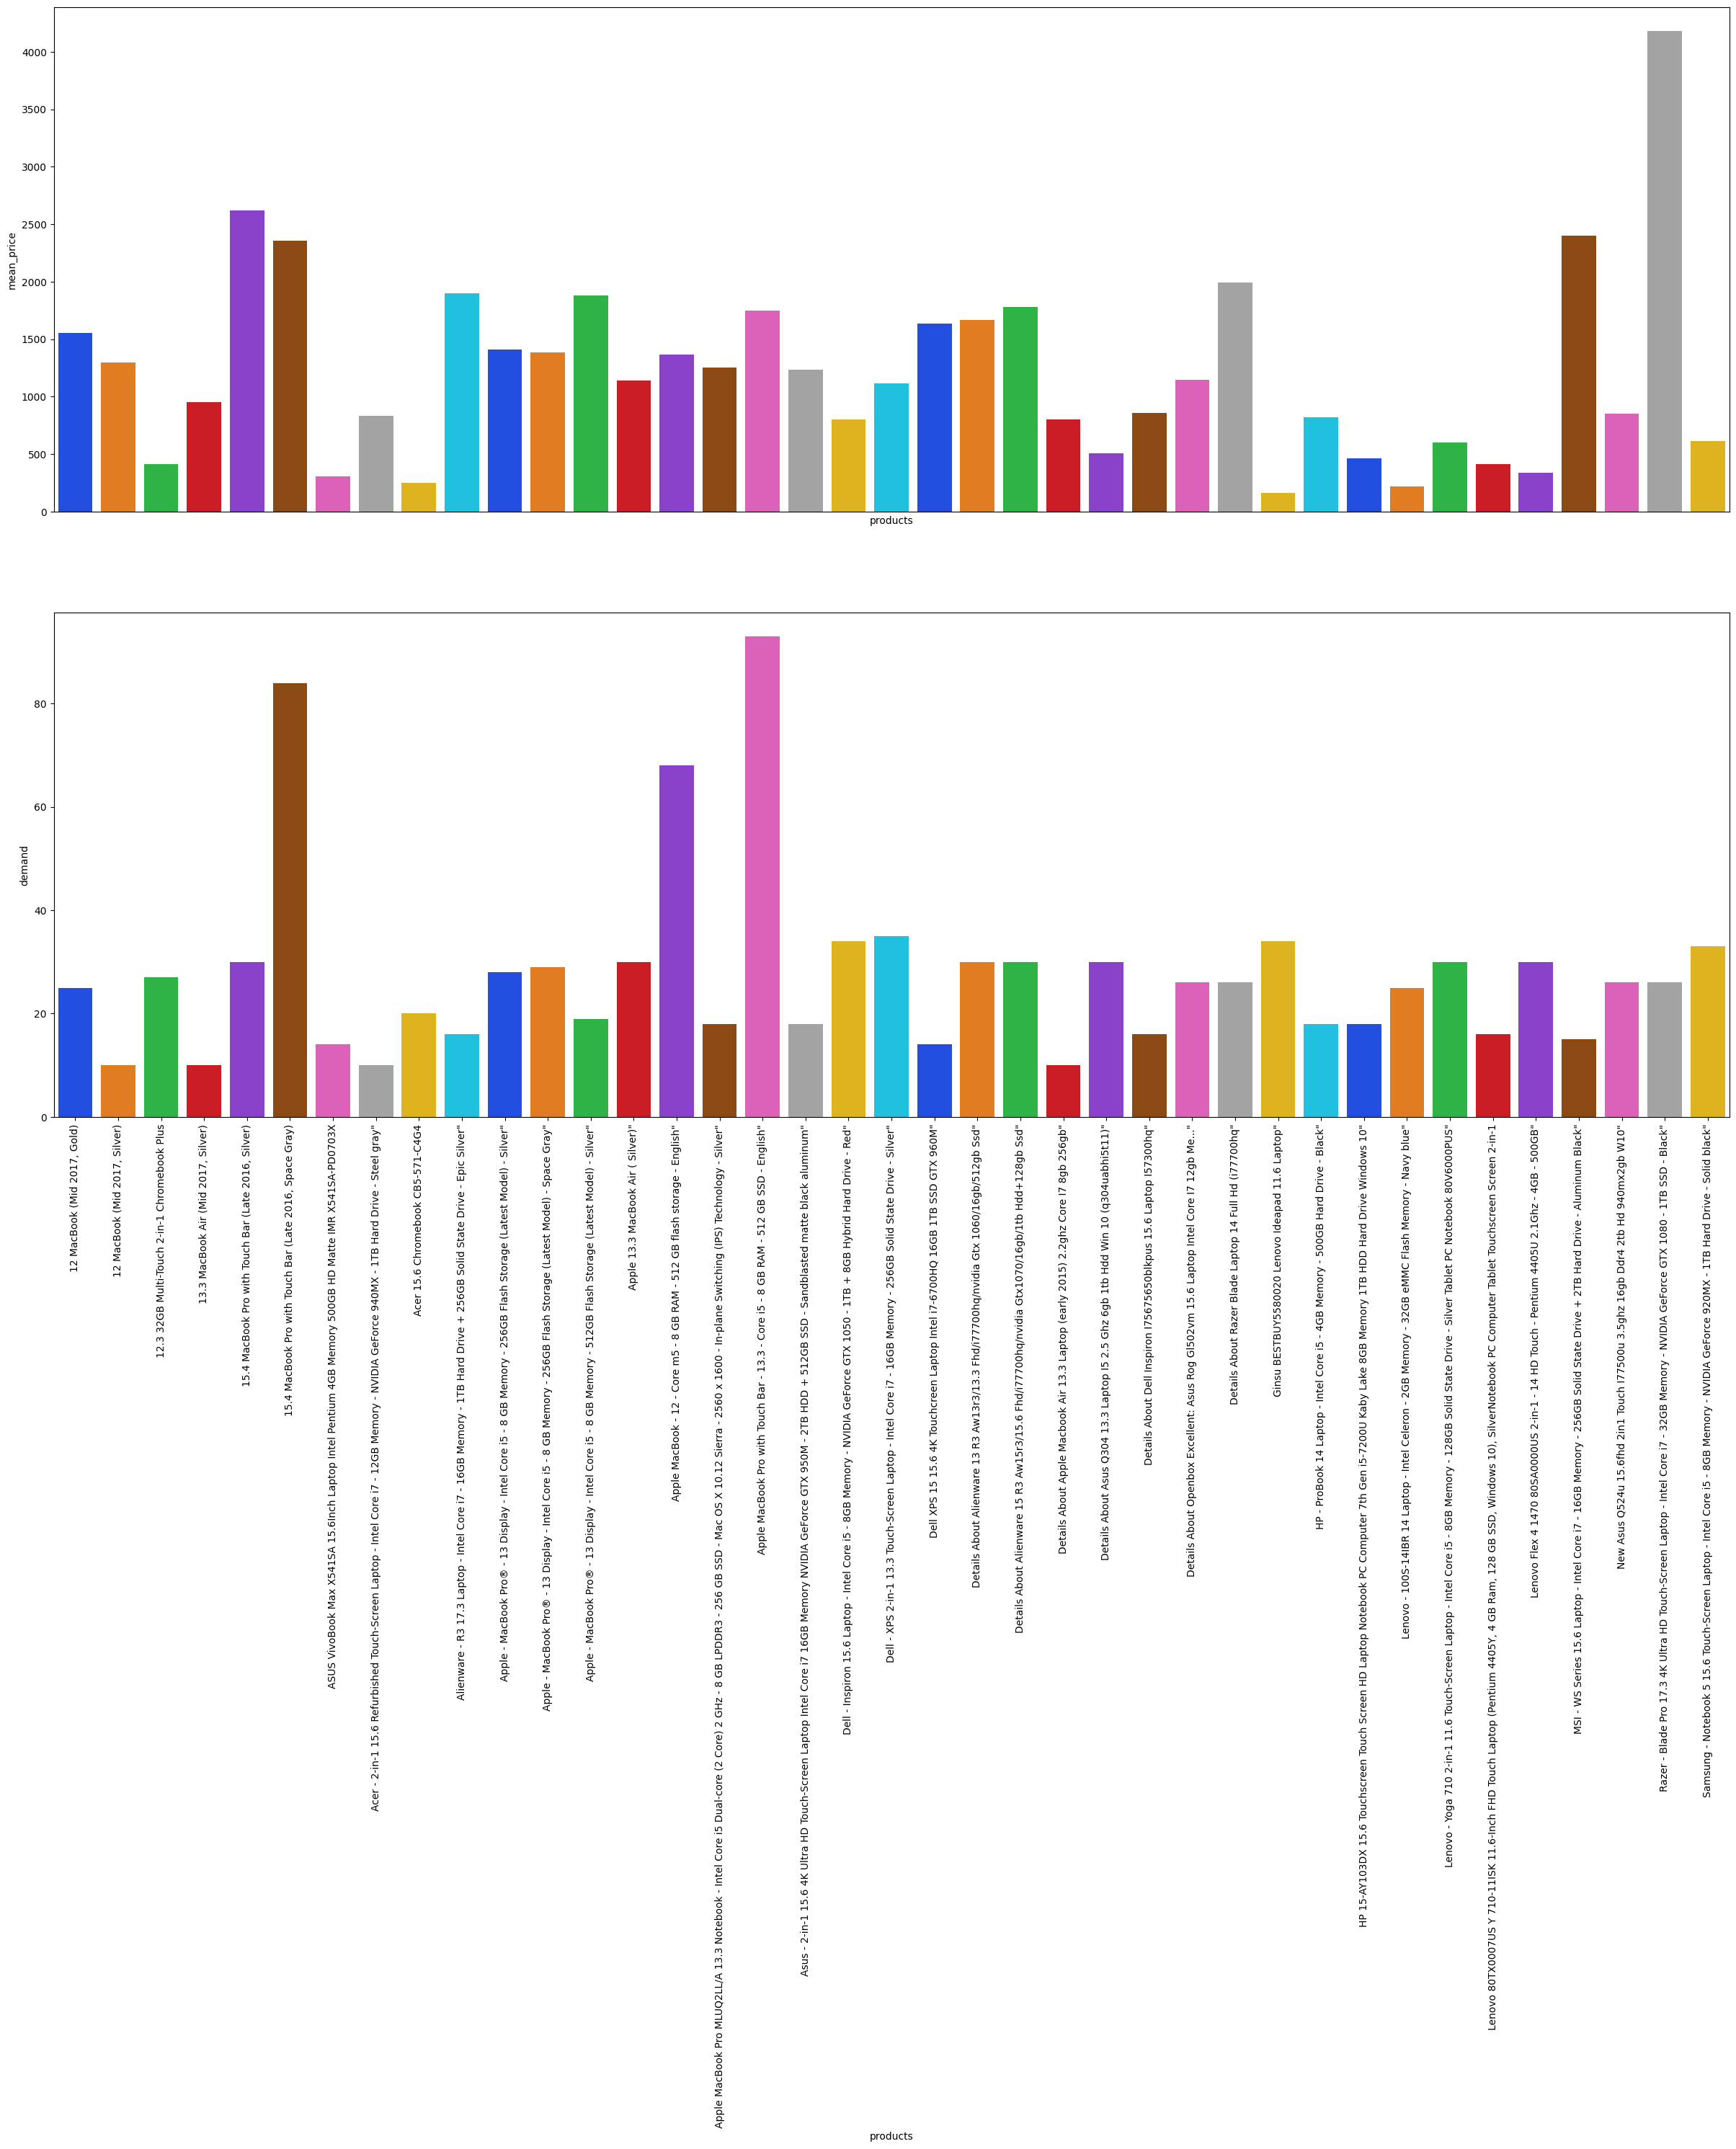

In [32]:
plt.figure(figsize=(30,20));

plt.subplot(2,1,1)
auxx1 = pd.DataFrame(x_mean_price.apply(lambda x: x.median())).reset_index()
auxx1.columns = ['products','mean_price']
sns.barplot(x='products',y='mean_price',data=auxx1,palette='bright');
plt.xticks([]);


plt.subplot(2,1,2)
auxx2 = pd.DataFrame(y_demanda.apply(lambda x: x.sum())).reset_index()
auxx2.columns = ['products','demand']
sns.barplot(x='products',y='demand',data=auxx2,palette='bright');
plt.xticks(rotation=90);

## 5.1 Mudança de preço por semana por produto

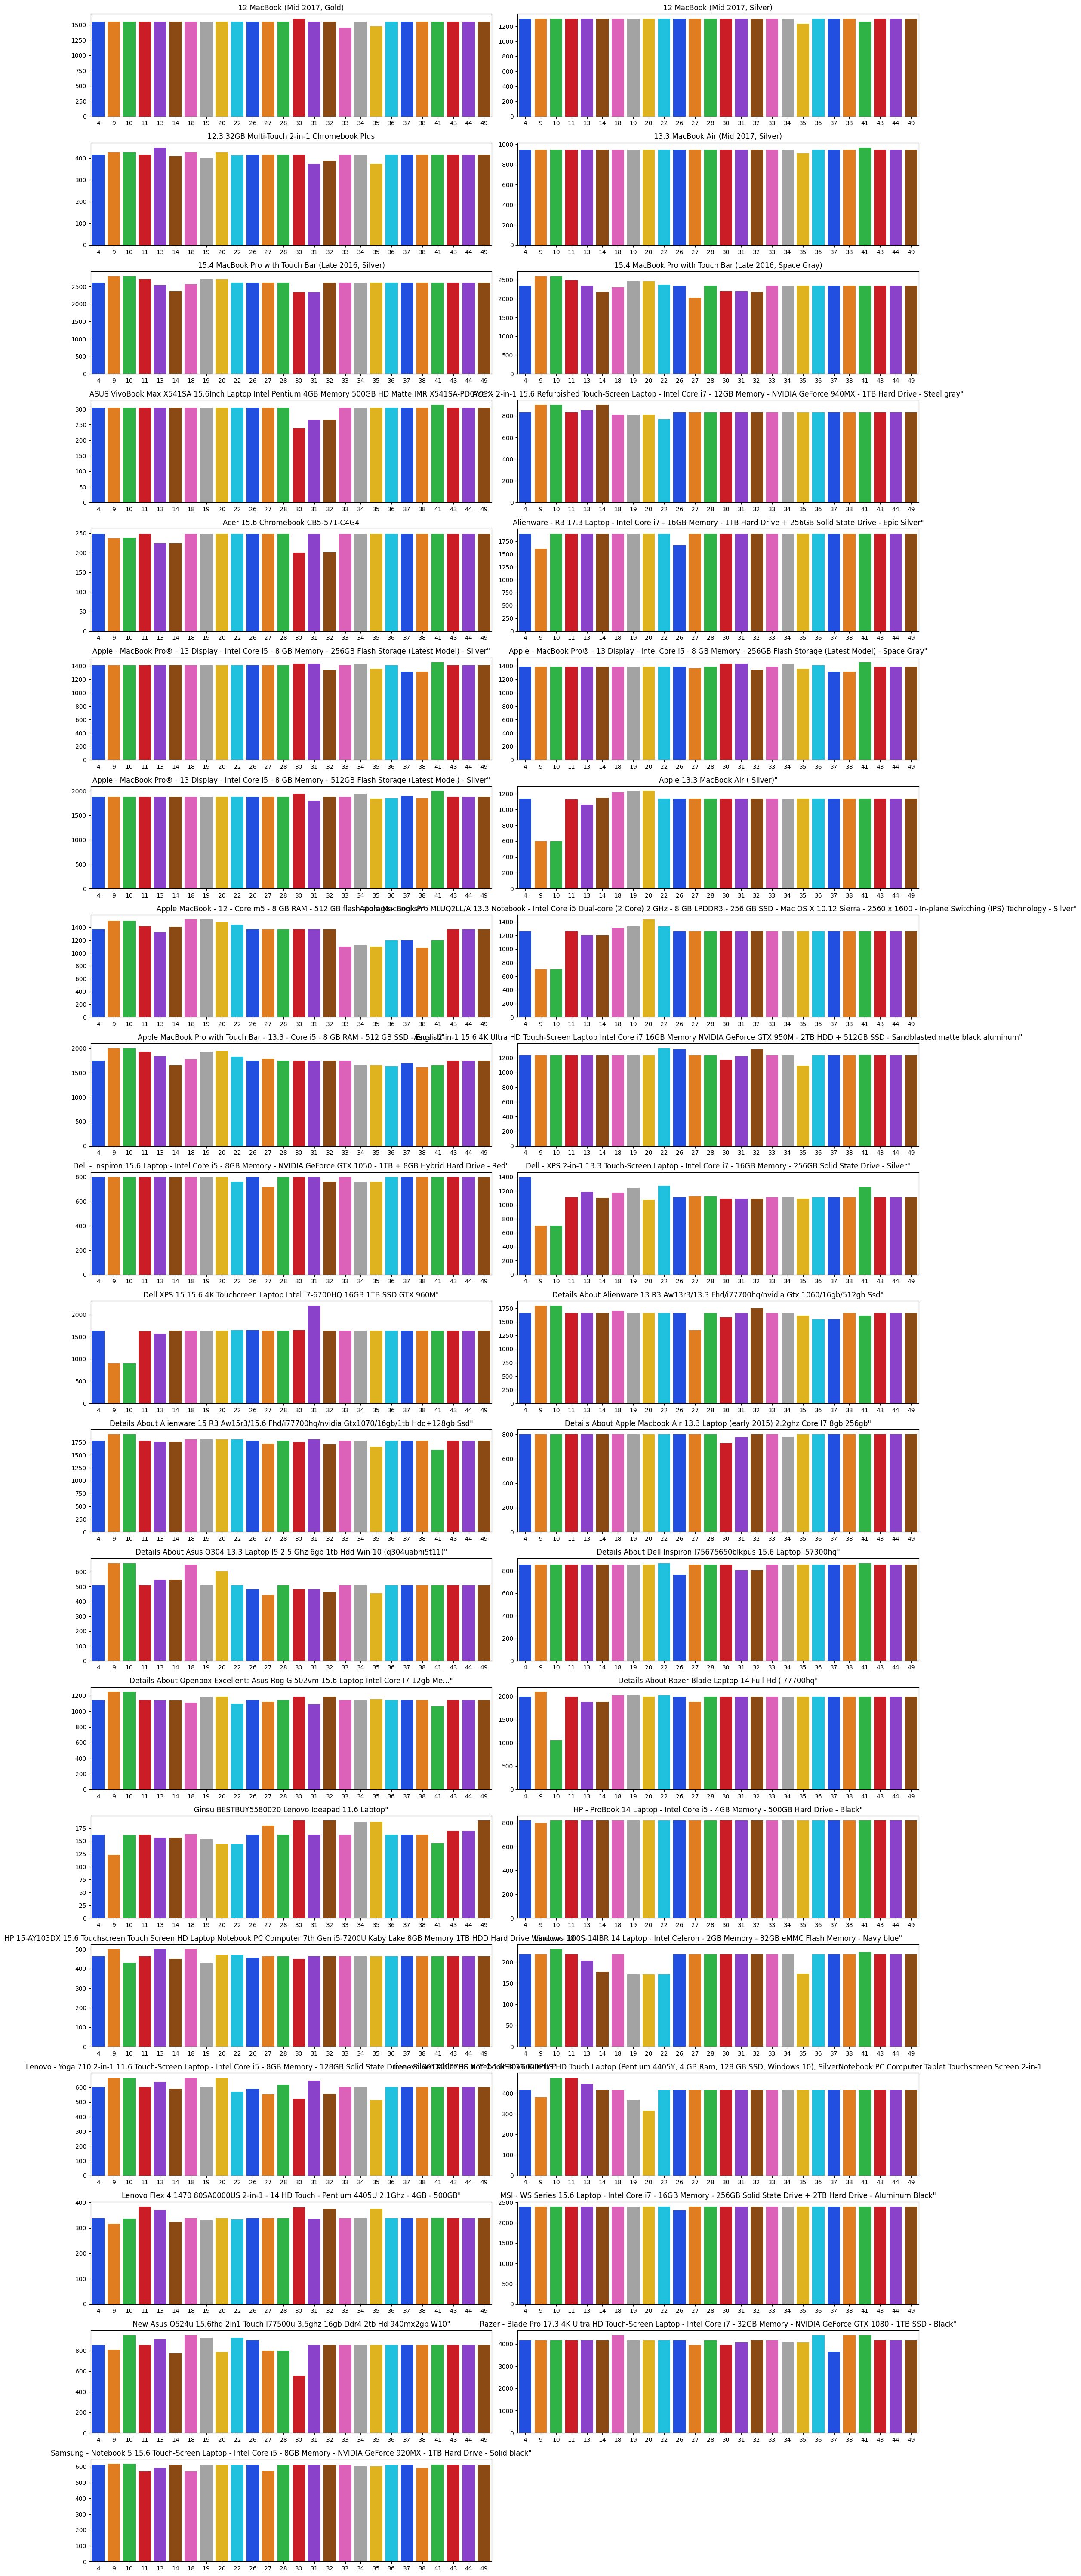

In [33]:
plt.figure(figsize=(20,60));

for k in np.arange(1,len(x_mean_price.columns)+1,1):
  plt.subplot(20,2,k);
  sns.barplot(x=x_mean_price.index.tolist(),y=x_mean_price[x_mean_price.columns[k-1]],data=x_mean_price,palette='bright');
  plt.title(x_mean_price.columns.tolist()[k-1]);
  plt.ylabel('')
  plt.tight_layout()

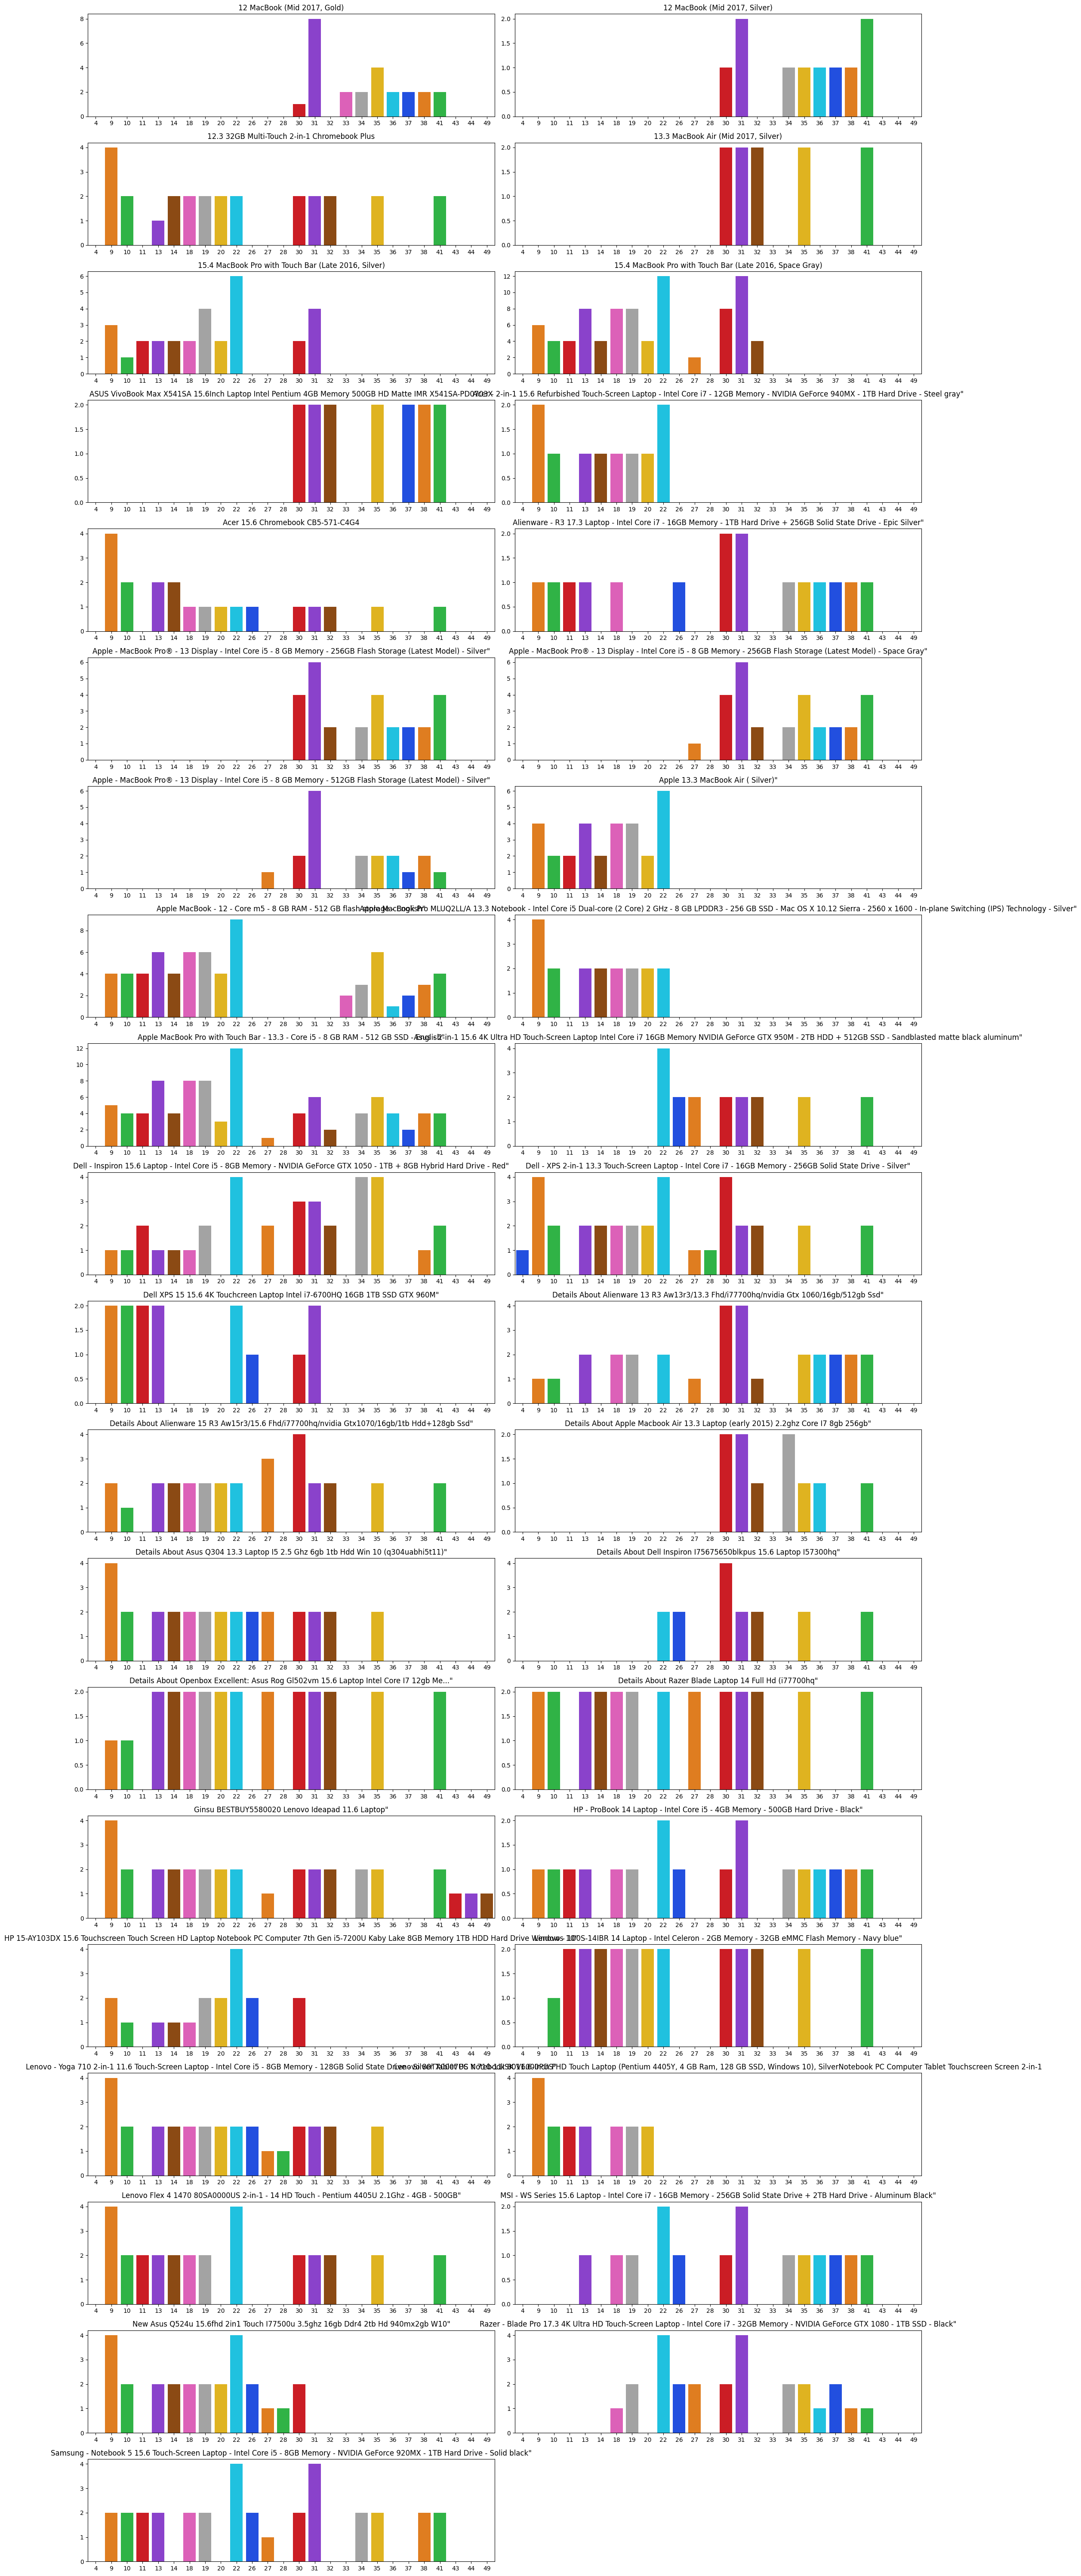

In [34]:
plt.figure(figsize=(20,60));

for k in np.arange(1,len(y_demanda.columns)+1,1):
  plt.subplot(20,2,k);
  sns.barplot(x=y_demanda.index.tolist(),y=y_demanda[y_demanda.columns[k-1]],data=y_demanda,palette='bright');
  plt.title(y_demanda.columns.tolist()[k-1]);
  plt.ylabel('')
  plt.tight_layout()

# 6.0 Machine Learning

## 6.1 12 MacBook (Mid 2017, Gold)

In [39]:
#df_laptop = df_best.loc[df_best['category_name'] == 'laptop, computer',:]
x_laptop = x_mean_price['12 MacBook (Mid 2017, Gold)']
y_laptop = y_demanda['12 MacBook (Mid 2017, Gold)']

X_laptop = sm.add_constant(x_laptop)

#instanciando o modelo
model = sm.OLS(y_laptop,X_laptop)

#treino
results = model.fit()

#resultados
print(results.summary())
print(results.params)

                                 OLS Regression Results                                
Dep. Variable:     12 MacBook (Mid 2017, Gold)   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.042
Method:                          Least Squares   F-statistic:                     2.108
Date:                         Thu, 11 Apr 2024   Prob (F-statistic):              0.159
Time:                                 20:35:05   Log-Likelihood:                -50.564
No. Observations:                           26   AIC:                             105.1
Df Residuals:                               24   BIC:                             107.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## 6.2 Todos os itens

In [40]:
results_values = {'name':[],
                  'price_elasticity':[],
                  'price_mean':[],
                  'quantity_mean':[],
                  'intercept':[],
                  'slope':[],
                  'rsquared':[],
                  'p_value':[]
                  }

for column in x_mean_price.columns:
  column_points = []
  for i in y_demanda.index.tolist():
    column_points.append((x_mean_price[column][i],y_demanda[column][i]))

  df = pd.DataFrame(list(column_points),columns=['x_mean_price','y_demanda'])
  x_laptop = df['x_mean_price']
  y_laptop = df['y_demanda']
  X_laptop = sm.add_constant(x_laptop)
  #instanciando o modelo
  model = sm.OLS(y_laptop,X_laptop)
  #treino
  results = model.fit()

  if results.f_pvalue < 0.05:
    rsquared = results.rsquared
    p_value = results.f_pvalue
    intercept, slope = results.params
    mean_price = np.mean(x_laptop)
    mean_quantity = np.mean(y_laptop)
    price_elastiscity = slope*(mean_price/mean_quantity)

    results_values['name'].append(column) 
    results_values['price_elasticity'].append(price_elastiscity) 
    results_values['price_mean'].append(mean_price) 
    results_values['quantity_mean'].append(mean_quantity) 
    results_values['intercept'].append(intercept) 
    results_values['slope'].append(slope) 
    results_values['rsquared'].append(rsquared)
    results_values['p_value'].append(p_value) 

dt_el = pd.DataFrame.from_dict(results_values)

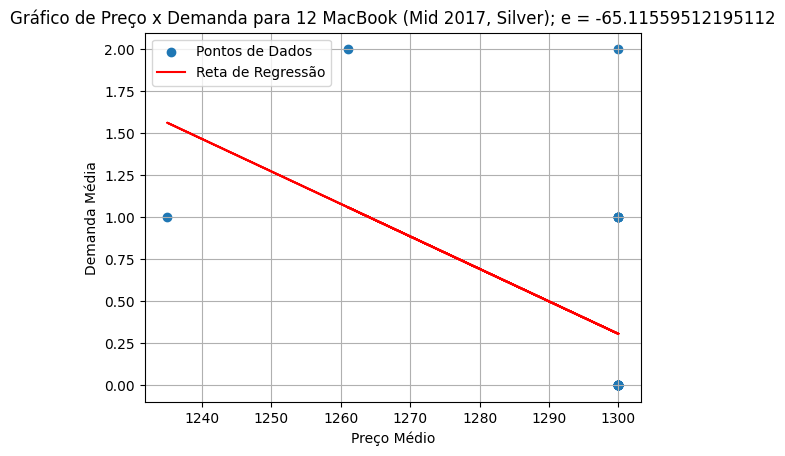

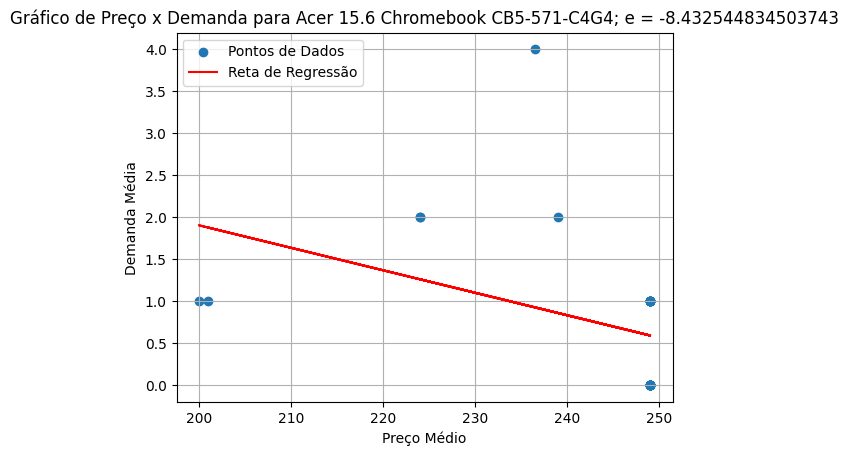

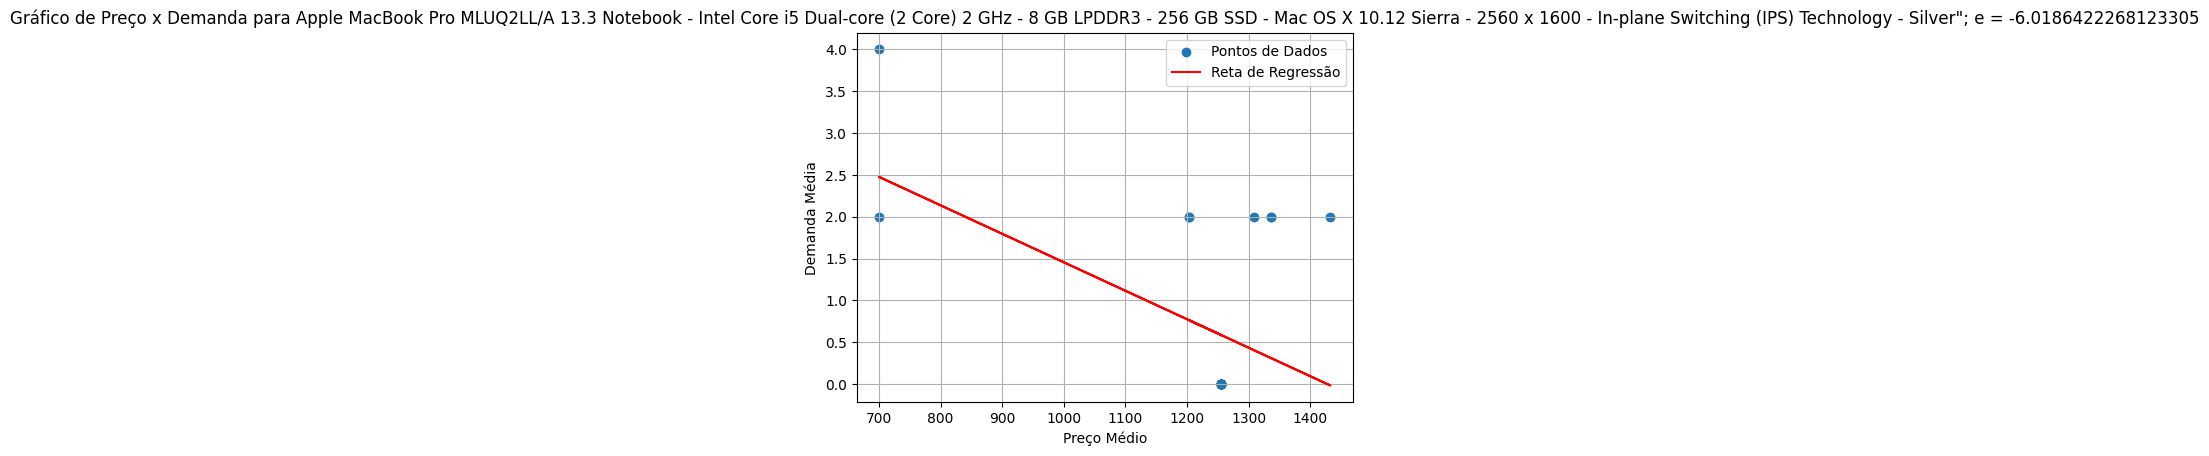

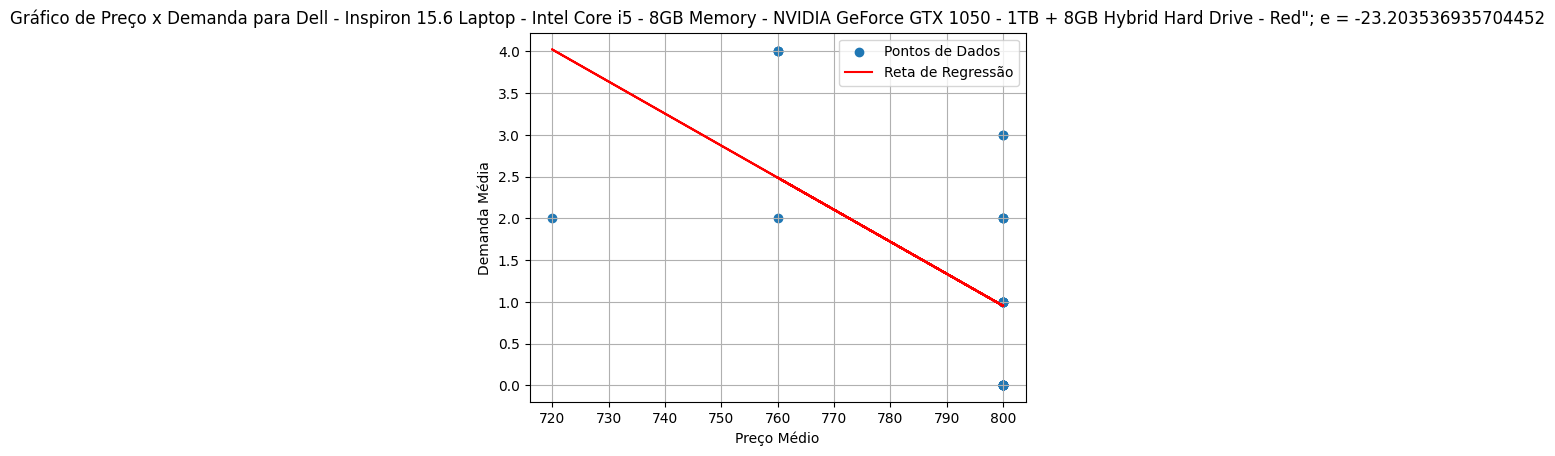

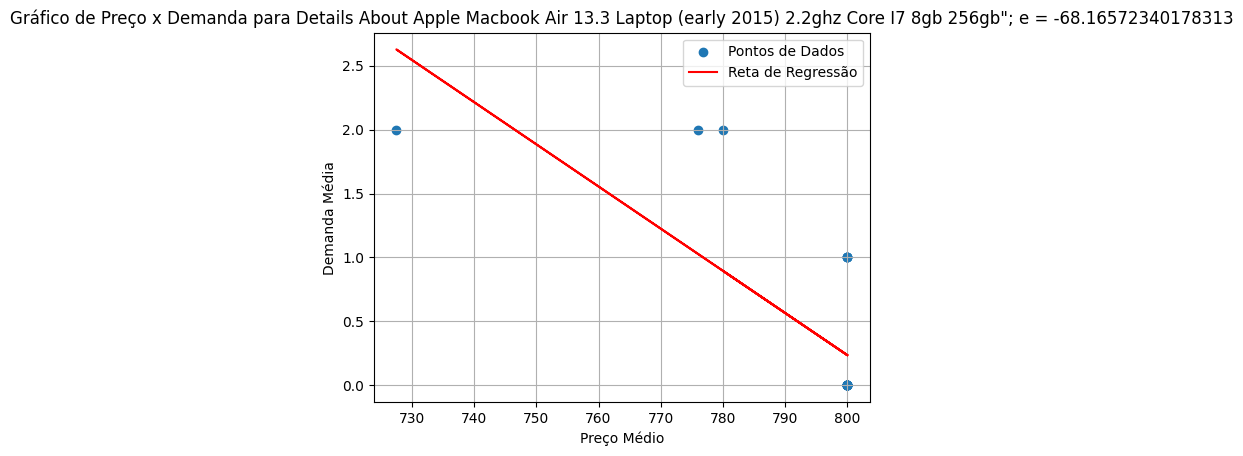

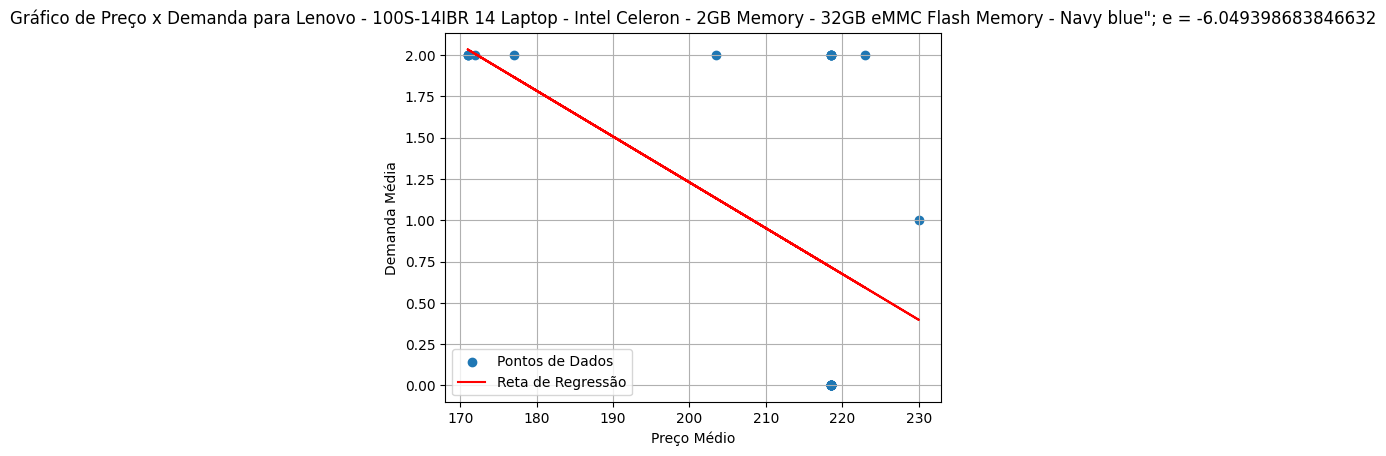

In [34]:
results_values = {'name':[],
                  'price_elasticity':[],
                  'price_mean':[],
                  'quantity_mean':[],
                  'intercept':[],
                  'slope':[],
                  'rsquared':[],
                  'p_value':[]
                  }

for column in x_mean_price.columns:
  column_points = []
  for i in y_demanda.index.tolist():
    column_points.append((x_mean_price[column][i],y_demanda[column][i]))

  df = pd.DataFrame(list(column_points),columns=['x_mean_price','y_demanda'])
  x_laptop = df['x_mean_price']
  y_laptop = df['y_demanda']
  X_laptop = sm.add_constant(x_laptop)
  #instanciando o modelo
  model = sm.OLS(y_laptop,X_laptop)
  #treino
  results = model.fit()

  if results.f_pvalue < 0.05:
    rsquared = results.rsquared
    p_value = results.f_pvalue
    intercept, slope = results.params
    mean_price = np.mean(x_laptop)
    mean_quantity = np.mean(y_laptop)
    price_elastiscity = slope*(mean_price/mean_quantity)

    results_values['name'].append(column) 
    results_values['price_elasticity'].append(price_elastiscity) 
    results_values['price_mean'].append(mean_price) 
    results_values['quantity_mean'].append(mean_quantity) 
    results_values['intercept'].append(intercept) 
    results_values['slope'].append(slope) 
    results_values['rsquared'].append(rsquared)
    results_values['p_value'].append(p_value) 

  # Criar um DataFrame apenas com os valores de preço e demanda
    df_price_demand = pd.DataFrame({
            'Preço Médio': df['x_mean_price'],
            'Demanda Média': df['y_demanda']
        })

        # Plotar os pontos de dados
    plt.scatter(df_price_demand['Preço Médio'], df_price_demand['Demanda Média'], label='Pontos de Dados')

        # Plotar a reta de regressão
    plt.plot(df_price_demand['Preço Médio'], results.params[0] + results.params[1]*df_price_demand['Preço Médio'], color='red', label='Reta de Regressão')

    # Definir limites dos eixos para mostrar o intervalo completo dos valores
    #plt.xlim(0, df_price_demand['Preço Médio'].max()+df_price_demand['Preço Médio'].std())
    #plt.ylim(0, df_price_demand['Demanda Média'].max()+df_price_demand['Demanda Média'].std())

    plt.xlabel('Preço Médio')
    plt.ylabel('Demanda Média')
    plt.title(f'Gráfico de Preço x Demanda para {column}; e = {price_elastiscity}')
    plt.legend()
    plt.grid(True)
    plt.show()

dt_el = pd.DataFrame.from_dict(results_values)

In [34]:
dt_el.to_csv('datasets/df_elastiscity.csv')
dt_el

name  price_elasticity  \
0                      12 MacBook (Mid 2017, Silver)        -65.115595   
1  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...        -16.039643   
2                  Acer 15.6 Chromebook CB5-571-C4G4         -8.432545   
3  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...         -6.018642   
4  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...        -23.203537   
5  Details About Apple Macbook Air 13.3 Laptop (e...        -68.165723   
6  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...         -6.049399   

    price_mean  quantity_mean  intercept     slope  rsquared   p_value  
0  1295.990000       0.384615  25.429075 -0.019325  0.196027  0.023508  
1   299.720769       0.538462   9.175192 -0.028816  0.281984  0.005251  
2   242.479231       0.769231   7.255804 -0.026751  0.161645  0.041743  
3  1224.221154       0.692308   4.859060 -0.003404  0.236464  0.011774  
4   790.759231       1.307692  31.650779 -0.038372  0.327839  0.002237  
5   795.509231       0.384615  26.602201 -0.032957  0.510312  0.000041  
6   209.663077       0.961538   6.778268 -0.027743  0.277667  0.005677

# 7.0 Elasticidade

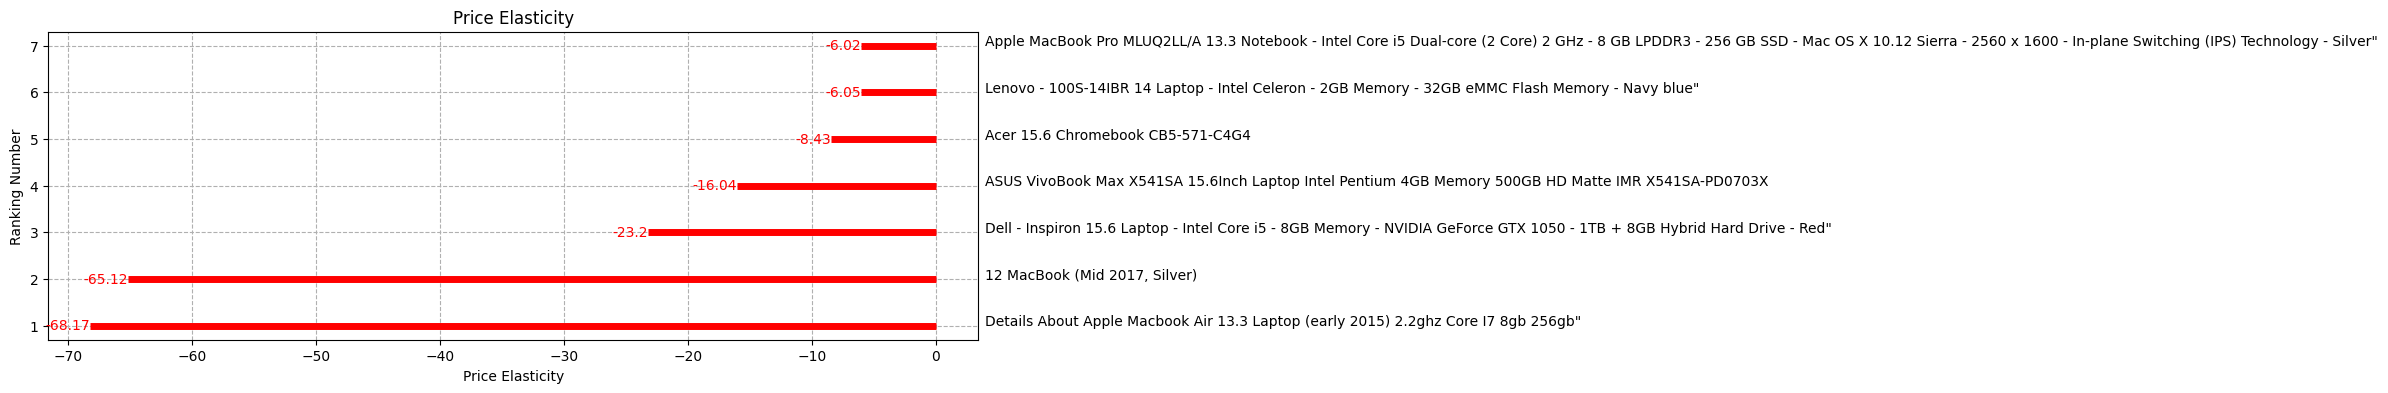

In [35]:
dt_el['ranking'] = dt_el.loc[:,'price_elasticity'].rank(ascending=True).astype(int)
dt_el = dt_el.reset_index(drop=True)

plt.figure(figsize=(12,4))
plt.hlines(y=dt_el['ranking'],xmin=0,xmax=dt_el['price_elasticity'],color='red',alpha=1,linewidth=5);

for name,p in zip(dt_el['name'],dt_el['ranking']):
  plt.text(4,p,name)
  
for x,y,s in zip(dt_el['price_elasticity'],dt_el['ranking'],dt_el['price_elasticity']):
  plt.text(x,y,round(s,2),horizontalalignment='right' if x < 0 else 'left',
           verticalalignment='center',
           fontdict={'color':'red' if x < 0 else 'green','size':10})

plt.gca().set(ylabel='Ranking Number', xlabel='Price Elasticity')
plt.title('Price Elasticity')
plt.grid(linestyle='--')

In [37]:
df_order_el = dt_el.loc[:,['ranking','name','price_elasticity']].sort_values(by='price_elasticity',ascending=True)
df_order_el

ranking                                               name  \
5        1  Details About Apple Macbook Air 13.3 Laptop (e...   
0        2                      12 MacBook (Mid 2017, Silver)   
4        3  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   
1        4  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   
2        5                  Acer 15.6 Chromebook CB5-571-C4G4   
6        6  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   
3        7  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   

   price_elasticity  
5        -68.165723  
0        -65.115595  
4        -23.203537  
1        -16.039643  
2         -8.432545  
6         -6.049399  
3         -6.018642

# 8.0 Business Performance

In [39]:
resultado_faturamento = {
  'name' : [],
  'faturamento_atual' : [],
  'faturamento_reducao' : [],
  'perda_faturamento' : [],
  'faturamento_novo': [],
  'varicao_faturamento' : [],
  'variacao_percentual' : []
}
desconto = -0.05
#como se desse o desconto em toda a categoria
for i in range(len(df_order_el)):
  preco_atual_medio = x_mean_price[df_order_el['name'][i]].mean()
  demanda_atual = y_demanda[df_order_el['name'][i]].sum()

  preco_com_reducao = preco_atual_medio*(1+desconto)
  #aqui usar realmente o valor de desconto dado
  aumento_demanda = desconto*df_order_el['price_elasticity'][i]
  demanda_nova = demanda_atual*(1+aumento_demanda)
  
  faturamento_atual = round(preco_atual_medio*demanda_atual,2)
  faturamento_novo = round(preco_com_reducao*demanda_nova,2)
  #pensando apenas na redução de preço
  faturamento_com_reducao = round(faturamento_atual*(1+desconto),2)
  perda_faturamento = faturamento_atual - faturamento_com_reducao
  variacao_faturamento = faturamento_novo - faturamento_atual
  variacao_faturamento_p = round(variacao_faturamento/faturamento_atual,2)

  resultado_faturamento['name'].append(df_order_el['name'][i])
  resultado_faturamento['faturamento_atual'].append(faturamento_atual)
  resultado_faturamento['faturamento_reducao'].append(faturamento_com_reducao)
  resultado_faturamento['perda_faturamento'].append(perda_faturamento)
  resultado_faturamento['faturamento_novo'].append(faturamento_novo)
  resultado_faturamento['varicao_faturamento'].append(variacao_faturamento)
  resultado_faturamento['variacao_percentual'].append(variacao_faturamento_p)

df_resultado_faturamento = pd.DataFrame.from_dict(resultado_faturamento)
df_resultado_faturamento

name  faturamento_atual  \
0                      12 MacBook (Mid 2017, Silver)           12959.90   
1  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...            4196.09   
2                  Acer 15.6 Chromebook CB5-571-C4G4            4849.58   
3  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...           22035.98   
4  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...           26885.81   
5  Details About Apple Macbook Air 13.3 Laptop (e...            7955.09   
6  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...            5241.58   

   faturamento_reducao  perda_faturamento  faturamento_novo  \
0             12311.90             648.00          52396.76   
1              3986.29             209.80           7183.22   
2              4607.10             242.48           6549.59   
3             20934.18            1101.80          27233.95   
4             25541.52            1344.29          55174.21   
5              7557.34             397.75          33314.91   
6              4979.50             262.08           6485.65   

   varicao_faturamento  variacao_percentual  
0             39436.86                 3.04  
1              2987.13                 0.71  
2              1700.01                 0.35  
3              5197.97                 0.24  
4             28288.40                 1.05  
5             25359.82                 3.19  
6              1244.07                 0.24

In [38]:
df_resultado_faturamento.to_csv('datasets/df_resultado_faturamento.csv')

# 9.0 Cross Price Elasticity

In [91]:
df9 = x_mean_price.copy()

df9['y_demanda ' + '12 MacBook (Mid 2017, Gold)'] = y_demanda['12 MacBook (Mid 2017, Gold)']

multi_x_values = df9.loc[:,df9.columns[0:-1]]
multi_y_values = df9.loc[:,df9.columns[-1]]

mean_x_values = np.mean(multi_x_values['12 MacBook (Mid 2017, Gold)'])
mean_y_values = np.mean(multi_y_values)

X = sm.add_constant(multi_x_values)
model = sm.OLS(multi_y_values,X,missing='drop')
result = model.fit()

result_sumary = result.summary()
p_value = result.pvalues

result_as_html = result_sumary.tables[1].as_html()
new_df = pd.read_html(result_as_html,header=0,index_col=0)[0]
new_df['p_value'] = p_value

new_df.index.name = 'name'
new_df.reset_index()

new_df['mean'] = mean_x_values
new_df['price_elasticity'] = round((new_df.coef)*(new_df['mean']/mean_y_values),2)

new_df = new_df.reset_index()

p_values_sig = new_df['p_value']

new_df['12 MacBook (Mid 2017, Gold)'+' CPE'] = np.where((p_values_sig > 0.05), 'No Effective', new_df['price_elasticity'])
new_df.dropna()

name          coef  \
0                                               const  9.786000e-06   
1                         12 MacBook (Mid 2017, Gold) -5.800000e-03   
2                       12 MacBook (Mid 2017, Silver) -7.800000e-03   
3        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus -2.210000e-02   
4                 13.3 MacBook Air (Mid 2017, Silver)  9.000000e-04   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  7.000000e-04   
6   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  3.900000e-03   
7   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel... -1.140000e-02   
8   Acer - 2-in-1 15.6 Refurbished Touch-Screen La... -1.540000e-02   
9                   Acer 15.6 Chromebook CB5-571-C4G4 -5.000000e-04   
10  Alienware - R3 17.3 Laptop - Intel Core i7 - 1... -7.000000e-03   
11  Apple - MacBook Pro® - 13 Display - Intel Core... -1.240000e-02   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  8.200000e-03   
13  Apple - MacBook Pro® - 13 Display - Intel Core...  8.600000e-03   
14                  Apple 13.3 MacBook Air ( Silver)" -8.000000e-04   
15  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ... -5.400000e-03   
16  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In... -1.430000e-02   
17  Apple MacBook Pro with Touch Bar - 13.3 - Core...  7.446000e-05   
18  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La... -2.900000e-03   
19  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ... -6.600000e-03   
20  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I... -1.052000e-17   
21  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...  1.540000e-02   
22  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/... -8.100000e-03   
23  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  1.100000e-03   
24  Details About Apple Macbook Air 13.3 Laptop (e...  3.000000e-04   
25  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...  1.780000e-02   
26  Details About Dell Inspiron I75675650blkpus 15... -5.200000e-03   
27  Details About Openbox Excellent: Asus Rog Gl50...  5.500000e-03   
28  Details About Razer Blade Laptop 14 Full Hd (i... -1.900000e-03   
29   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"  1.228000e-16   
30  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...  7.500000e-03   
31  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD... -1.600000e-03   
32  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ... -1.300000e-02   
33  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap... -5.733000e-05   
34  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To... -1.100000e-03   
35  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...  4.700000e-03   
36  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  1.590000e-02   
37  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g... -1.547000e-05   
38  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  1.200000e-03   
39  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...  5.700000e-03   

         std err             t  P>|t|        [0.025        0.975]  \
0   9.390000e-19  1.040000e+13  0.000  9.790000e-06  9.790000e-06   
1   7.040000e-16 -8.280000e+12  0.000 -6.000000e-03 -6.000000e-03   
2   3.940000e-16 -1.980000e+13  0.000 -8.000000e-03 -8.000000e-03   
3   7.160000e-16 -3.080000e+13  0.000 -2.200000e-02 -2.200000e-02   
4   2.050000e-16  4.240000e+12  0.000  1.000000e-03  1.000000e-03   
5   3.610000e-16  1.930000e+12  0.000  1.000000e-03  1.000000e-03   
6   3.850000e-16  1.010000e+13  0.000  4.000000e-03  4.000000e-03   
7   3.220000e-16 -3.530000e+13  0.000 -1.100000e-02 -1.100000e-02   
8   1.910000e-15 -8.070000e+12  0.000 -1.500000e-02 -1.500000e-02   
9   3.870000e-16 -1.330000e+12  0.000 -1.000000e-03 -1.000000e-03   
10  6.130000e-16 -1.140000e+13  0.000 -7.000000e-03 -7.000000e-03   
11  7.390000e-16 -1.680000e+13  0.000 -1.200000e-02 -1.200000e-02   
12  4.190000e-16  1.950000e+13  0.000  8.000000e-03  8.000000e-03   
13  5.840000e-16  1.480000e+13  0.000  9.000000e-03  9.000000e-03   
14  1.050000e-15 -7.440000e+11  0.000 -1.000000e-03 -1.000000e-03   
15  1.760000e-16 -3.060000e+13  0

In [51]:
def crossprice(x_mean_price,y_demanda,column_name):
  df9 = x_mean_price.copy()

  df9['y_demanda ' + column_name] = y_demanda[column_name]

  multi_x_values = df9.loc[:,df9.columns[0:-1]]
  multi_y_values = df9.loc[:,df9.columns[-1]]

  mean_x_values = np.mean(multi_x_values[column_name])
  mean_y_values = np.mean(multi_y_values)

  X = sm.add_constant(multi_x_values)
  model = sm.OLS(multi_y_values,X,missing='drop')
  result = model.fit()

  result_sumary = result.summary()
  p_value = result.pvalues

  result_as_html = result_sumary.tables[1].as_html()
  new_df = pd.read_html(result_as_html,header=0,index_col=0)[0]
  new_df['p_value'] = p_value

  new_df.index.name = 'name'
  new_df.reset_index()

  new_df['mean'] = mean_x_values
  new_df['price_elasticity'] = round((new_df.coef)*(new_df['mean']/mean_y_values),2)

  new_df = new_df.reset_index()

  p_values_sig = new_df['p_value']

  new_df[column_name +' CPE'] = np.where((p_values_sig > 0.05), 'No Effective', new_df['price_elasticity'])
  new_df.dropna()
  new_df = new_df.iloc[1:,:]

  return new_df[['name',column_name +' CPE']]

In [52]:
result_df = pd.DataFrame()
for column in x_mean_price.columns:
  result_df[['name',column +' CPE']] = crossprice(x_mean_price,y_demanda,column)

In [53]:
result_df.to_csv('datasets/df_crossprice.csv')
result_df

name  \
1                         12 MacBook (Mid 2017, Gold)   
2                       12 MacBook (Mid 2017, Silver)   
3        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus   
4                 13.3 MacBook Air (Mid 2017, Silver)   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Si...   
6   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...   
7   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   
8   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...   
9                   Acer 15.6 Chromebook CB5-571-C4G4   
10  Alienware - R3 17.3 Laptop - Intel Core i7 - 1...   
11  Apple - MacBook Pro® - 13 Display - Intel Core...   
12  Apple - MacBook Pro® - 13 Display - Intel Core...   
13  Apple - MacBook Pro® - 13 Display - Intel Core...   
14                  Apple 13.3 MacBook Air ( Silver)"   
15  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...   
16  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   
17  Apple MacBook Pro with Touch Bar - 13.3 - Core...   
18  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...   
19  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   
20  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...   
21  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...   
22  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...   
23  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...   
24  Details About Apple Macbook Air 13.3 Laptop (e...   
25  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...   
26  Details About Dell Inspiron I75675650blkpus 15...   
27  Details About Openbox Excellent: Asus Rog Gl50...   
28  Details About Razer Blade Laptop 14 Full Hd (i...   
29   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"   
30  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...   
31  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...   
32  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   
33  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...   
34  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...   
35  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...   
36  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...   
37  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...   
38  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...   
39  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...   

   12 MacBook (Mid 2017, Gold) CPE 12 MacBook (Mid 2017, Silver) CPE  \
1                            -9.33                              15.5   
2                           -12.55                            -10.45   
3                           -35.56                            -26.28   
4                             1.45                              3.71   
5                             1.13                             -1.01   
6                             6.28                             11.79   
7                           -18.34                            -18.53   
8                           -24.78                             -18.2   
9                             -0.8                             -5.39   
10                          -11.26                             -4.04   
11                          -19.95                            -22.24   
12                           13.19                             10.45   
13                           13.84                             22.58   
14                           -1.29                             -1.35   
15                           -8.69                             -5.73   
16                          -23.01                            -18.53   
17                            0.12                             -3.71   
18                           -4.67                              2.02   
19                          -10.62                             -9.77   
20                    No Effective                      No Effective   
21                           24.78                             16.17   
22                          -13.03                            -16.17   
23                            1.77                             -9.77   
24                            0.48      

## 9.1 Elasticidade de Preços Cruzada de outra forma

In [121]:
df9 = y_demanda.copy()

df9['x_price ' + '12 MacBook (Mid 2017, Silver)'] = x_mean_price['12 MacBook (Mid 2017, Silver)']

df_final = pd.DataFrame()

for colum in df9.columns[0:-1]:

  multi_y_values = df9.loc[:,colum]
  multi_x_values = df9.loc[:,df9.columns[-1]]

  mean_y_values = np.mean(multi_y_values)
  mean_x_values = np.mean(multi_x_values)

  X = sm.add_constant(multi_x_values)
  model = sm.OLS(multi_y_values,X,missing='drop')
  result = model.fit()

  result_sumary = result.summary()
  p_value = result.pvalues

  result_as_html = result_sumary.tables[1].as_html()
  new_df = pd.read_html(result_as_html,header=0,index_col=0)[0]
  new_df['p_value'] = p_value

  new_df.index.name = 'name'
  new_df.reset_index()

  new_df['mean'] = mean_x_values
  new_df['price_elasticity'] = round((new_df.coef)*(new_df['mean']/mean_y_values),2)

  new_df = new_df.reset_index()
  new_df.loc[1,['name']] = colum

  p_values_sig = new_df['p_value']

  new_df['12 MacBook (Mid 2017, Silver)'+' CPE'] = np.where((p_values_sig > 0.05), 'No Effective', new_df['price_elasticity'])
  new_df.dropna()
  df_final = pd.concat([df_final,new_df.loc[1:,:]])

df_final

name    coef  std err      t  \
1                        12 MacBook (Mid 2017, Gold) -0.0447    0.023 -1.904   
1                      12 MacBook (Mid 2017, Silver) -0.0193    0.008 -2.419   
1       12.3 32GB Multi-Touch 2-in-1 Chromebook Plus -0.0188    0.016 -1.204   
1                13.3 MacBook Air (Mid 2017, Silver) -0.0315    0.009 -3.421   
1  15.4 MacBook Pro with Touch Bar (Late 2016, Si...  0.0225    0.022  1.001   
1  15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  0.0630    0.054  1.170   
1  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel... -0.0285    0.011 -2.540   
1  Acer - 2-in-1 15.6 Refurbished Touch-Screen La...  0.0075    0.009  0.855   
1                  Acer 15.6 Chromebook CB5-571-C4G4 -0.0045    0.013 -0.339   
1  Alienware - R3 17.3 Laptop - Intel Core i7 - 1... -0.0075    0.009 -0.855   
1  Apple - MacBook Pro® - 13 Display - Intel Core... -0.0570    0.021 -2.714   
1  Apple - MacBook Pro® - 13 Display - Intel Core... -0.0563    0.021 -2.696   
1  Apple - MacBook Pro® - 13 Display - Intel Core... -0.0174    0.018 -0.946   
1                  Apple 13.3 MacBook Air ( Silver)"  0.0225    0.025  0.908   
1  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ... -0.0514    0.035 -1.472   
1  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...  0.0135    0.015  0.874   
1  Apple MacBook Pro with Touch Bar - 13.3 - Core... -0.0326    0.043 -0.753   
1  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La... -0.0255    0.015 -1.723   
1  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ... -0.0379    0.018 -2.146   
1  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I... -0.0128    0.018 -0.696   
1  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...  0.0105    0.012  0.889   
1  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/... -0.0165    0.017 -0.985   
1  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/... -0.0165    0.016 -1.014   
1  Details About Apple Macbook Air 13.3 Laptop (e... -0.0120    0.009 -1.273   
1  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz... -0.0019    0.016 -0.116   
1  Details About Dell Inspiron I75675650blkpus 15... -0.0270    0.014 -1.886   
1  Details About Openbox Excellent: Asus Rog Gl50... -0.0195    0.013 -1.489   
1  Details About Razer Blade Laptop 14 Full Hd (i... -0.0195    0.014 -1.425   
1   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop" -0.0135    0.014 -0.937   
1  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M... -0.0060    0.009 -0.702   
1  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...  0.0135    0.014  0.937   
1  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ... -0.0203    0.013 -1.519   
1  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap... -0.0019    0.016 -0.120   
1  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...  0.0120    0.015  0.792   
1  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T... -0.0165    0.018 -0.934   
1  MSI - WS Series 15.6 Laptop - Intel Core i7 - ... -0.0083    0.009 -0.934   
1  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...  0.0195    0.017  1.133   
1  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree... -0.0122    0.017 -0.715   
1  Samsung - Notebook 5 15.6 Touch-Screen Laptop ... -0.0143    0.017 -0.827   

   P>|t|  [0.025  0.975]   p_value     mean  price_elasticity  \
1  0.069  -0.093   0.004  0.068926  1295.99            -60.25   
1  0.024  -0.036  -0.003  0.023508  1295.99            -65.03   
1  0.241  -0.051   0.013  0.240501  1295.99            -23.46   
1  0.002  -0.051  -0.013  0.002238  1295.99           -106.14   
1  0.327  -0.024   0.069  0.326710  1295.99             25.27   
1  0.254  -0.048   0.174  0.253537  1295.99             25.27   
1  0.018  -0.052  -0.005  0.017980  1295.99            -68.59   
1  0.401  -0.011   0.026  0.400966  1295.99             25.27   
1  0.737  -0.032   0.023  0.737214  1295.99             -7.58   
1  0.401  -0.026   0.011  0.400966  1295.99            -15.79   
1  0.012  -0.100  -0.014  0.012119  1295.99            -68.59   
1  0.013  -0.099  -0.013  0.012631  1295.99            -65.42   
1 

In [181]:
def CrossPrice_2(x_mean_price,y_demanda,column_name):
  df9 = y_demanda.copy()

  df9['x_price ' + column_name] = x_mean_price[column_name]

  df_final = pd.DataFrame()

  for colum in df9.columns[0:-1]:

    multi_y_values = df9.loc[:,colum]
    multi_x_values = df9.loc[:,df9.columns[-1]]

    mean_y_values = np.mean(multi_y_values)
    mean_x_values = np.mean(multi_x_values)

    X = sm.add_constant(multi_x_values)
    model = sm.OLS(multi_y_values,X,missing='drop')
    result = model.fit()

    result_sumary = result.summary()
    p_value = result.pvalues

    result_as_html = result_sumary.tables[1].as_html()
    new_df = pd.read_html(result_as_html,header=0,index_col=0)[0]
    new_df['p_value'] = p_value

    new_df.index.name = 'name'
    new_df.reset_index()

    new_df['mean'] = mean_x_values
    new_df['price_elasticity'] = round((new_df.coef)*(new_df['mean']/mean_y_values),2)

    new_df = new_df.reset_index()
    new_df.loc[1,['name']] = colum

    p_values_sig = new_df['p_value']

    new_df[column_name+' CPE'] = np.where((p_values_sig > 0.05), 0, new_df['price_elasticity'])
    new_df.dropna()
    df_final = pd.concat([df_final,new_df.loc[1:,:]])

  return df_final[['name',column_name +' CPE']]

In [182]:
result_df_2 = pd.DataFrame()
for column in x_mean_price.columns:
  result_df_2[['name',column +' CPE']] = CrossPrice_2(x_mean_price,y_demanda,column)

In [183]:
result_df_2.reset_index(drop=True).to_csv('datasets/df_crossprice_2.csv',index=False)
result_df_2.reset_index(drop=True)

name  \
0                         12 MacBook (Mid 2017, Gold)   
1                       12 MacBook (Mid 2017, Silver)   
2        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus   
3                 13.3 MacBook Air (Mid 2017, Silver)   
4   15.4 MacBook Pro with Touch Bar (Late 2016, Si...   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...   
6   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   
7   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...   
8                   Acer 15.6 Chromebook CB5-571-C4G4   
9   Alienware - R3 17.3 Laptop - Intel Core i7 - 1...   
10  Apple - MacBook Pro® - 13 Display - Intel Core...   
11  Apple - MacBook Pro® - 13 Display - Intel Core...   
12  Apple - MacBook Pro® - 13 Display - Intel Core...   
13                  Apple 13.3 MacBook Air ( Silver)"   
14  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...   
15  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   
16  Apple MacBook Pro with Touch Bar - 13.3 - Core...   
17  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...   
18  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   
19  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...   
20  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...   
21  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...   
22  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...   
23  Details About Apple Macbook Air 13.3 Laptop (e...   
24  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...   
25  Details About Dell Inspiron I75675650blkpus 15...   
26  Details About Openbox Excellent: Asus Rog Gl50...   
27  Details About Razer Blade Laptop 14 Full Hd (i...   
28   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"   
29  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...   
30  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...   
31  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   
32  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...   
33  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...   
34  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...   
35  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...   
36  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...   
37  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...   
38  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...   

    12 MacBook (Mid 2017, Gold) CPE  12 MacBook (Mid 2017, Silver) CPE  \
0                               0.0                               0.00   
1                               0.0                             -65.03   
2                               0.0                               0.00   
3                               0.0                            -106.14   
4                               0.0                               0.00   
5                               0.0                               0.00   
6                               0.0                             -68.59   
7                               0.0                               0.00   
8                               0.0                               0.00   
9                               0.0                               0.00   
10                              0.0                             -68.59   
11                              0.0                             -65.42   
12                              0.0                               0.00   
13                              0.0                               0.00   
14                              0.0                               0.00   
15                              0.0                               0.00   
16                              0.0                               0.00   
17                              0.0                               0.00   
18                              0.0                             -37.56   
19                              0.0                               0.00   
20                              0.0                               0.00   
21                              0.0                               0.00   
22                              0.0                               

# 10.0 Projeto em Produção

## 10.1 Criando função para gera a elasticidade de preço

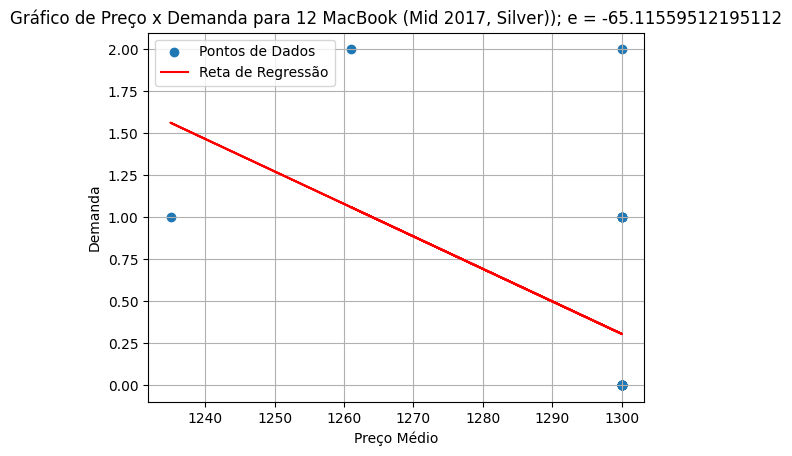

name  price_elasticity  price_mean  quantity_mean  \
0  12 MacBook (Mid 2017, Silver)        -65.115595     1295.99       0.384615   

   intercept     slope  rsquared   p_value  
0  25.429075 -0.019325  0.196027  0.023508

In [184]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

warnings.filterwarnings( 'ignore' )

df_raw = pd.read_csv('datasets/df_ready.csv')

df_raw = df_raw.drop(columns=['Unnamed: 0', 'Date_imp', 'Cluster', 'condition','currency', 'imageURLs','shipping', 'sourceURLs', 'weight', 'Date_imp_d.1','Zscore_1','price_std'])

df_raw.columns = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'date_added', 'date_seen', 'date_updated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']

df1 = df_raw.copy()
df1['date_imp'] = pd.to_datetime(df1['date_imp'])
df_best = df1.loc[df1['merchant'] == 'Bestbuy.com',:]
df_laptop = df_best.loc[df_best['category_name'] == 'laptop, computer',:]


test = df_laptop.groupby(['name','week_number']).agg({'disc_price':'mean','date_imp':'count'}).reset_index()

x_mean_price = test.pivot(index='week_number',columns='name',values='disc_price')

y_demanda = test.pivot(index='week_number',columns='name',values='date_imp')

mediana_x = np.round(x_mean_price.median(),2) #O preço existia, mas não vendi
x_mean_price.fillna(mediana_x,inplace=True)
y_demanda.fillna(0,inplace=True)

def elasticidade_de_preco(x_mean_price,y_demanda,nome):
        #MODELO
        #df_laptop = df_best.loc[df_best['category_name'] == 'laptop, computer',:]
        x_laptop = x_mean_price[nome]
        y_laptop = y_demanda[nome]

        results_values = {'name':[],
                        'price_elasticity':[],
                        'price_mean':[],
                        'quantity_mean':[],
                        'intercept':[],
                        'slope':[],
                        'rsquared':[],
                        'p_value':[]
                        }

        X_laptop = sm.add_constant(x_laptop)

        #instanciando o modelo
        model = sm.OLS(y_laptop,X_laptop)

        #treino
        results = model.fit()


        rsquared = results.rsquared
        p_value = results.f_pvalue
        intercept, slope = results.params
        mean_price = np.mean(x_laptop)
        mean_quantity = np.mean(y_laptop)
        price_elastiscity = slope*(mean_price/mean_quantity)

        results_values['name'].append(nome) 
        results_values['price_elasticity'].append(price_elastiscity) 
        results_values['price_mean'].append(mean_price) 
        results_values['quantity_mean'].append(mean_quantity) 
        results_values['intercept'].append(intercept) 
        results_values['slope'].append(slope) 
        results_values['rsquared'].append(rsquared)
        results_values['p_value'].append(p_value) 

        # Criar um DataFrame apenas com os valores de preço e demanda
        df_price_demand = pd.DataFrame({
                'Preço Médio': x_laptop,
                'Demanda Média': y_laptop
                })

                # Plotar os pontos de dados
        plt.scatter(df_price_demand['Preço Médio'], df_price_demand['Demanda Média'], label='Pontos de Dados')

                # Plotar a reta de regressão
        plt.plot(df_price_demand['Preço Médio'], results.params[0] + results.params[1]*df_price_demand['Preço Médio'], color='red', label='Reta de Regressão')

        plt.xlabel('Preço Médio')
        plt.ylabel('Demanda')
        plt.title(f'Gráfico de Preço x Demanda para {nome}); e = {price_elastiscity}')
        plt.legend()
        plt.grid(True)
        plt.show()

        return pd.DataFrame.from_dict(results_values)
nome = '12 MacBook (Mid 2017, Silver)'
df_elasticidade = elasticidade_de_preco(x_mean_price,y_demanda,nome)
df_elasticidade

## 10.2 Separando a lista de produtos que serão usados como filtro

In [185]:
lista_produtos = sorted(df_laptop.name.unique().tolist())
lista_produtos[1]

'12 MacBook (Mid 2017, Silver)'

## 10.3 Aplicando desconto nesse produto, como o produto e a categoria funciona

In [186]:
df_cross = pd.read_csv('datasets/df_crossprice_2.csv')
df_elasticidade


def faturamento_elasticidade_cruzada(desconto,nome,df_cross,df_elasticidade,x_mean_price,y_demanda):
  df_resultado_faturamento_total = pd.DataFrame()

  #desconto = -0.05
  for i in range(len(lista_produtos)):

    resultado_faturamento = {
    'name' : [],
    'demanda_atual_outro' : [],
    'demanda_nova' : [],
    'faturamento_atual' : [],
    'faturamento_novo': [],
    'varicao_faturamento' : [],
    'variacao_percentual' : []
  }

    elasticidade_cruzada = df_cross[nome + ' CPE'][i]
    #valores médios do produto com desconto
    preco_atual_medio_produto = df_elasticidade['price_mean']

    preco_atual_medio_outro = x_mean_price[lista_produtos[i]].mean()
    demanda_atual_outro = y_demanda[lista_produtos[i]].sum()

    preco_com_reducao = preco_atual_medio_produto*(1+desconto)
    #aqui usar realmente o valor de desconto dado
    aumento_demanda = desconto*elasticidade_cruzada
    demanda_nova = demanda_atual_outro*(1+aumento_demanda)

    if demanda_nova <= 0:
      demanda_nova = 0

    faturamento_atual = round(preco_atual_medio_outro*demanda_atual_outro,2)
    if lista_produtos[i] == nome:
      faturamento_novo = round(preco_com_reducao[0]*demanda_nova,2)
    else:
      faturamento_novo = round(preco_atual_medio_outro*demanda_nova,2)
    #pensando apenas na redução de preço
    #faturamento_com_reducao = round(faturamento_atual*(1-desconto),2)
    #perda_faturamento = faturamento_atual - faturamento_com_reducao
    diferenca_faturamento = faturamento_novo - faturamento_atual
    variacao_faturamento_p = round(diferenca_faturamento/faturamento_atual,2)

    resultado_faturamento['name'].append(lista_produtos[i])
    resultado_faturamento['demanda_atual_outro'].append(demanda_atual_outro)
    resultado_faturamento['demanda_nova'].append(demanda_nova)
    resultado_faturamento['faturamento_atual'].append(faturamento_atual)
    resultado_faturamento['faturamento_novo'].append(faturamento_novo)
    resultado_faturamento['varicao_faturamento'].append(diferenca_faturamento)
    resultado_faturamento['variacao_percentual'].append(variacao_faturamento_p)

    df_resultado_faturamento = pd.DataFrame.from_dict(resultado_faturamento)
    df_resultado_faturamento_total = pd.concat([df_resultado_faturamento_total,df_resultado_faturamento])

  return df_resultado_faturamento_total

In [187]:
desconto = 0.05
df_final = faturamento_elasticidade_cruzada(desconto,nome,df_cross,df_elasticidade,x_mean_price,y_demanda)
df_final

name  demanda_atual_outro  \
0                        12 MacBook (Mid 2017, Gold)                 25.0   
0                      12 MacBook (Mid 2017, Silver)                 10.0   
0       12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                 27.0   
0                13.3 MacBook Air (Mid 2017, Silver)                 10.0   
0  15.4 MacBook Pro with Touch Bar (Late 2016, Si...                 30.0   
0  15.4 MacBook Pro with Touch Bar (Late 2016, Sp...                 84.0   
0  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...                 14.0   
0  Acer - 2-in-1 15.6 Refurbished Touch-Screen La...                 10.0   
0                  Acer 15.6 Chromebook CB5-571-C4G4                 20.0   
0  Alienware - R3 17.3 Laptop - Intel Core i7 - 1...                 16.0   
0  Apple - MacBook Pro® - 13 Display - Intel Core...                 28.0   
0  Apple - MacBook Pro® - 13 Display - Intel Core...                 29.0   
0  Apple - MacBook Pro® - 13 Display - Intel Core...                 19.0   
0                  Apple 13.3 MacBook Air ( Silver)"                 30.0   
0  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...                 68.0   
0  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...                 18.0   
0  Apple MacBook Pro with Touch Bar - 13.3 - Core...                 93.0   
0  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...                 18.0   
0  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...                 34.0   
0  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...                 35.0   
0  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...                 14.0   
0  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...                 30.0   
0  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...                 30.0   
0  Details About Apple Macbook Air 13.3 Laptop (e...                 10.0   
0  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...                 30.0   
0  Details About Dell Inspiron I75675650blkpus 15...                 16.0   
0  Details About Openbox Excellent: Asus Rog Gl50...                 26.0   
0  Details About Razer Blade Laptop 14 Full Hd (i...                 26.0   
0   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"                 34.0   
0  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...                 18.0   
0  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...                 18.0   
0  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...                 25.0   
0  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...                 30.0   
0  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...                 16.0   
0  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...                 30.0   
0  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...                 15.0   
0  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...                 26.0   
0  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...                 26.0   
0  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...                 33.0   

   demanda_nova  faturamento_atual  faturamento_novo  varicao_faturamento  \
0          25.0           38678.12          38678.12                 0.00   
0           0.0           12959.90              0.00            -12959.90   
0          27.0           11156.12          11156.12                 0.00   
0           0.0            9492.98              0.00             -9492.98   
0          30.0           78221.82          78221.82                 0.00   
0          84.0          197140.70         197140.70                 0.00   
0           0.0            4196.09              0.00             -4196.09   
0          10.0            8340.28           8340.28                 0.00   
0          20.0            4849.58           4849.58                 0.00   
0          16.0           30074.30          30074.30                 0.00   
0           0.0           39267.03              0.00            -39267.03   
0           0.0           40217.69         

## 10.4 Resultado Final do Desconto

In [188]:
faturamento_antigo = df_final['faturamento_atual'].sum()
faturamento_novo = df_final['faturamento_novo'].sum()
variacao_faturamento_total = (faturamento_novo-faturamento_antigo)/faturamento_antigo

In [189]:
print(faturamento_antigo)
print(faturamento_novo)
print(variacao_faturamento_total)

1407506.45
1274486.9499999997
-0.09450720456733981


## 10.5 Produtos complementares e Substitutos

In [190]:

def substitutos_correspondentes(desconto,df_final,nome):
  df_final['demanda_aumento'] = df_final['demanda_nova'] - df_final['demanda_atual_outro']
  if desconto > 0:
    return df_final.loc[(df_final['demanda_aumento'] > 0) & (df_final['name'] != nome), 'name'].tolist(), df_final.loc[(df_final['demanda_aumento'] < 0) & (df_final['name'] != nome), 'name'].tolist()
  else:
    return df_final.loc[(df_final['demanda_aumento'] < 0) & (df_final['name'] != nome), 'name'].tolist(), df_final.loc[(df_final['demanda_aumento'] > 0) & (df_final['name'] != nome), 'name'].tolist()
  
substitutos,correspondentes =  substitutos_correspondentes(desconto,df_final,nome)
  
print(substitutos)
print(correspondentes)

[]
['13.3 MacBook Air (Mid 2017, Silver)', 'ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X', 'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver"', 'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray"', 'Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red"']
